### Multi-omic Dataset: Latent representation using Denoising Autoencoders
- Load Data
- Normalize Data
- Define Autoencoder Model
- Train Autoencoder with normalized dataset
- Use transformed dataset for classification
- Use transformed dataset for clustering
- Evaluation and Conclusions

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
sns.set()

# Load Data
X_brca_mRNA_data = pd.read_csv('./BRCA_mRNA.txt', sep=',', index_col=0) # Dataset has Donor ID as first column
X_brca_CNA_data = pd.read_csv('./BRCA_CNA.txt', sep=',' ,index_col=0) # Dataset has Donor ID as first column
y_brca_data = pd.read_csv('./BRCA_Clinical.txt', sep=',', index_col=0, names=["Label"]) # Dataset has Donor ID on first column and Label on second column.

X_brca_mRNA_filtered = X_brca_mRNA_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=1)
X_brca_CNA_filtered = X_brca_CNA_data.drop(["TCGA-AR-A0U1-01"], axis=1)
y_brca_filtered = y_brca_data.drop(["TCGA-AO-A12C-01","TCGA-AR-A1AT-01","TCGA-BH-A18V-06"], axis=0)


X_train_first_norm, X_train_second_norm, X_swapped_first_norm, X_swapped_second_norm, X_test_first_norm, X_test_second_norm, X_train_concat, X_swapped_concat, X_test_concat, y_train, y_test, y_train_oh, y_test_oh \
    = Models.prepare_datasets(X_brca_mRNA_filtered.T,X_brca_CNA_filtered.T, y_brca_filtered, test_size=0.2, swap_noise=0.15)


swapping: 20 rows.


In [7]:
import importlib
importlib.reload(Models)

<module 'Models' from 'C:\\Desarrollo\\Data Science\\Jupyter Notebooks\\Stage\\oss-stage-2019\\Multiomic Dataset\\Models.py'>

Compression: 105.93

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00110: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00115: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00120: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00120: early stopping


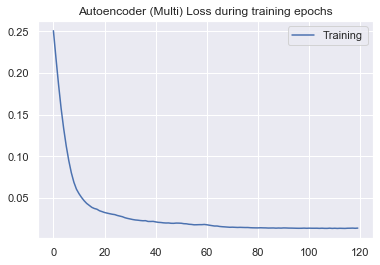

0.013641360430763317


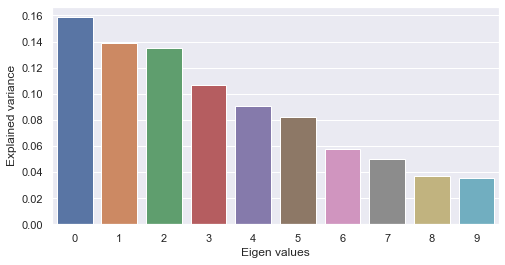

PCA on single-modal explained variance ratio: 0.8929288387298584


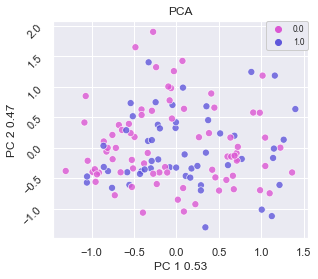

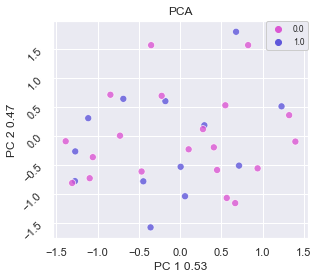

Results for AE: 

Best score for training data: 0.623076923076923 

Best C: 0.08 



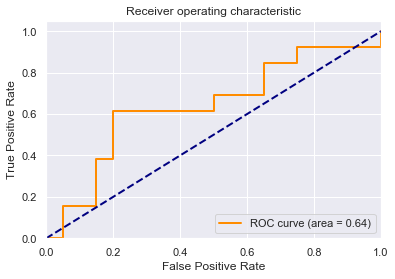

[[19  1]
 [11  2]]


              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.67      0.15      0.25        13

    accuracy                           0.64        33
   macro avg       0.65      0.55      0.50        33
weighted avg       0.65      0.64      0.56        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.6153846153846153 

Best C: 1.0 

Best Gamma: 0.1 



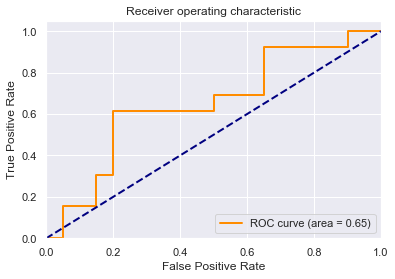

[[16  4]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.50      0.31      0.38        13

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33

Training set score for SVM: 0.730769
Testing  set score for SVM: 0.606061
Best score for training data: 0.6384615384615385 

Best #estimators: 100 

Best max depth: 12 



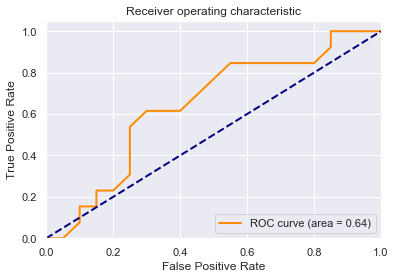

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


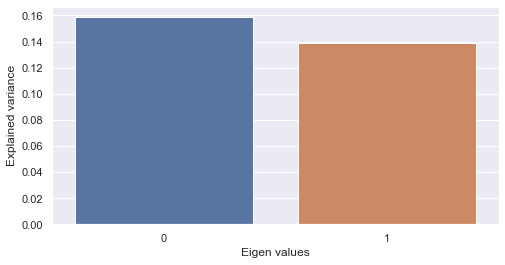

PCA on single-modal explained variance ratio: 0.2975921332836151


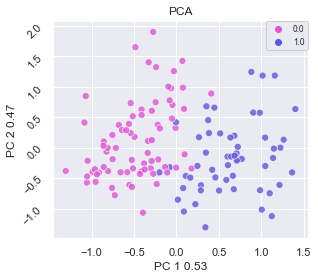

2 clusters -  silhoutte score: 0.1409243494272232 - mutual information: 0.0018366520996142013
3 clusters -  silhoutte score: 0.14055778086185455 - mutual information: 0.0012541674515530183
4 clusters -  silhoutte score: 0.14479179680347443 - mutual information: 0.012467559269938523


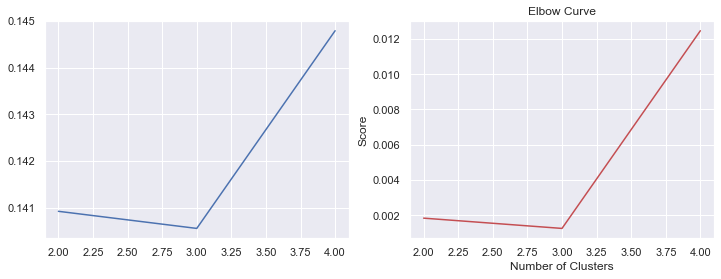

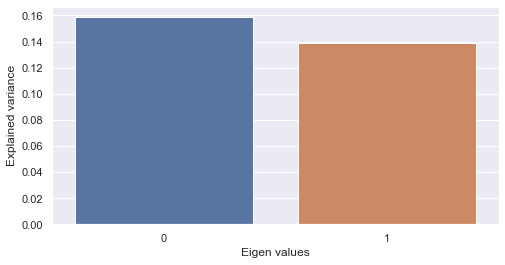

PCA on single-modal explained variance ratio: 0.2975921332836151


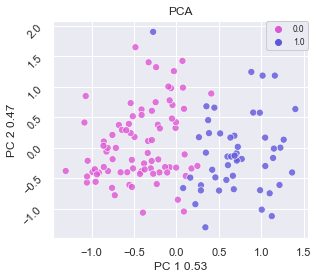

2 clusters -  silhoutte score: 0.1375894844532013 - mutual information: 4.150889760354438e-07
3 clusters -  silhoutte score: 0.10622502863407135 - mutual information: 0.012568814313759037
4 clusters -  silhoutte score: 0.12509718537330627 - mutual information: 0.021350085898788836


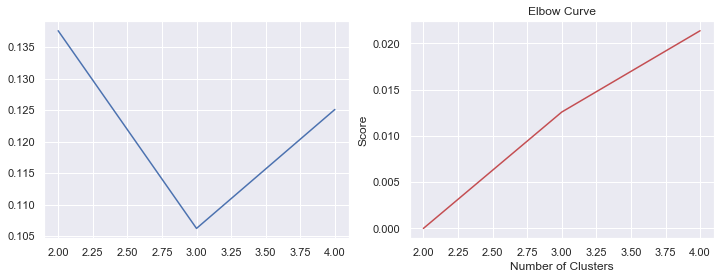

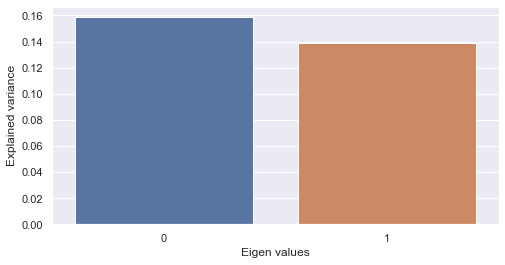

PCA on single-modal explained variance ratio: 0.2975921332836151


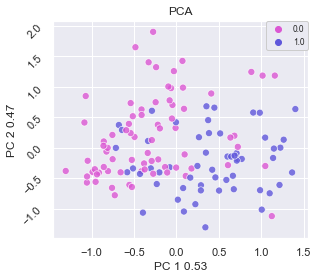

2 clusters -  silhoutte score: 0.09575716406106949 - mutual information: 0.0005078444682366787
3 clusters -  silhoutte score: 0.09495076537132263 - mutual information: 0.00039548933278820125
4 clusters -  silhoutte score: 0.10672322660684586 - mutual information: 0.017386785618945015


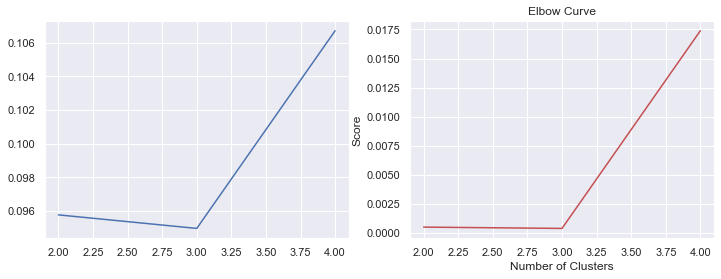

Compression: 105.93

Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00115: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00121: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00128: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00133: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00133: early stopping


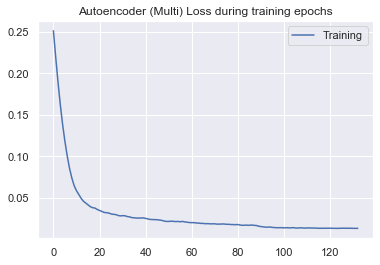

0.01356615792386807


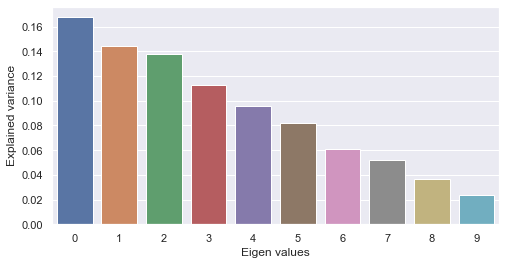

PCA on single-modal explained variance ratio: 0.9132117033004761


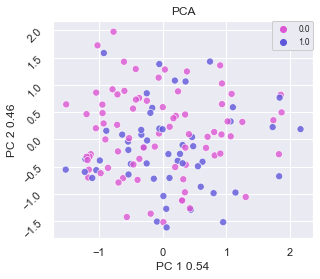

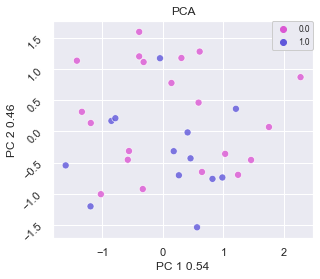

Results for AE: 

Best score for training data: 0.6615384615384615 

Best C: 0.08 



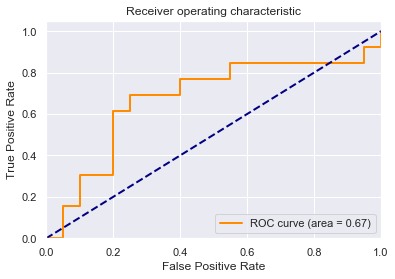

[[16  4]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.56      0.38      0.45        13

    accuracy                           0.64        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.62      0.64      0.62        33

Training set score for Logistic Regression: 0.700000
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.6307692307692309 

Best C: 1.0 

Best Gamma: 0.1 



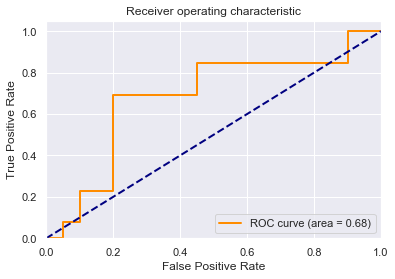

[[16  4]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.60      0.46      0.52        13

    accuracy                           0.67        33
   macro avg       0.65      0.63      0.63        33
weighted avg       0.66      0.67      0.66        33

Training set score for SVM: 0.715385
Testing  set score for SVM: 0.666667
Best score for training data: 0.6307692307692309 

Best #estimators: 140 

Best max depth: None 



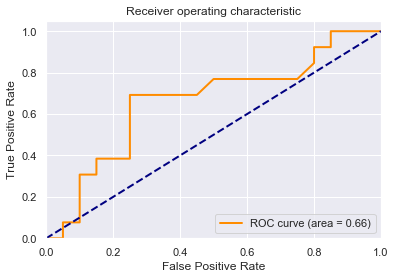

[[15  5]
 [ 4  9]]


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.64      0.69      0.67        13

    accuracy                           0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.727273


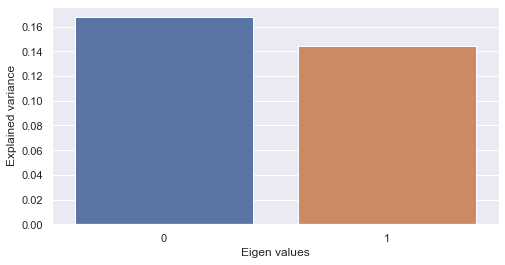

PCA on single-modal explained variance ratio: 0.3116037845611572


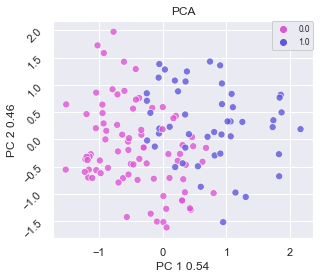

2 clusters -  silhoutte score: 0.1384722739458084 - mutual information: 0.0002557917778618253
3 clusters -  silhoutte score: 0.13530761003494263 - mutual information: 0.0021284623533427754
4 clusters -  silhoutte score: 0.12360496819019318 - mutual information: 0.006217222186602085


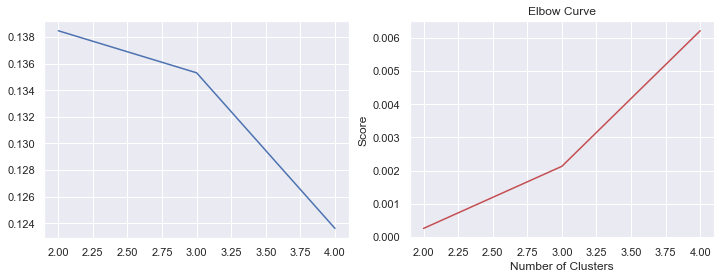

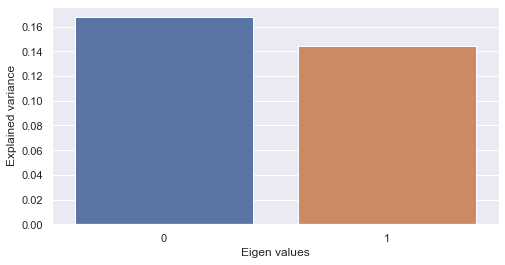

PCA on single-modal explained variance ratio: 0.3116037845611572


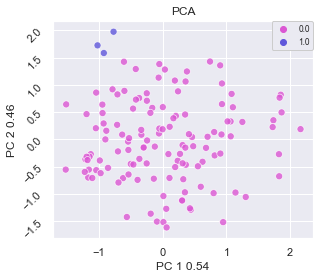

2 clusters -  silhoutte score: 0.11519434303045273 - mutual information: 0.0007042201374994366
3 clusters -  silhoutte score: 0.09739595651626587 - mutual information: 0.00043189405422992995
4 clusters -  silhoutte score: 0.10861960798501968 - mutual information: 0.011704223823625308


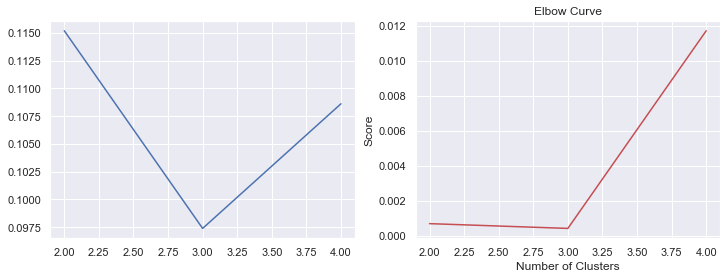

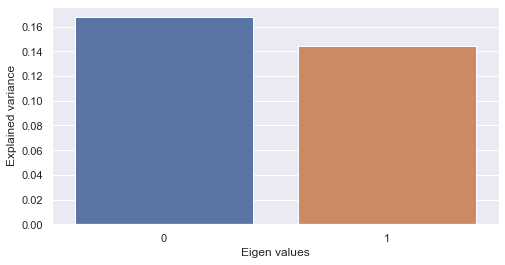

PCA on single-modal explained variance ratio: 0.3116037845611572


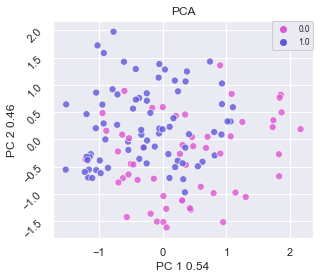

2 clusters -  silhoutte score: 0.12454795837402344 - mutual information: 0.004902777429406791
3 clusters -  silhoutte score: 0.134397491812706 - mutual information: 0.007735527555368941
4 clusters -  silhoutte score: 0.0915769636631012 - mutual information: 0.007087362806422523


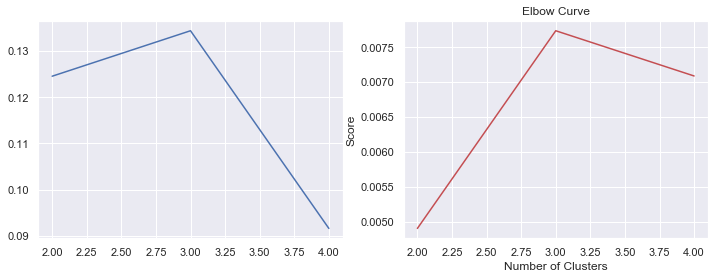

Compression: 105.93

Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00082: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00103: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00108: early stopping


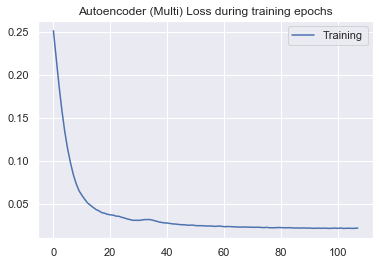

0.02206424093590333


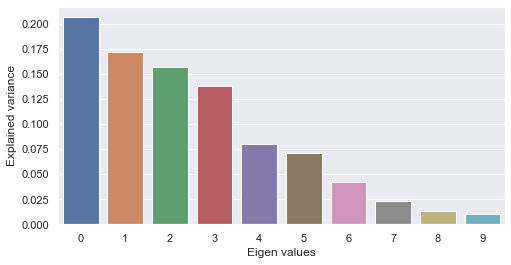

PCA on single-modal explained variance ratio: 0.9120408296585083


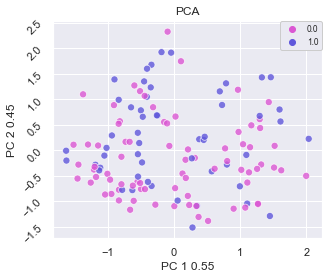

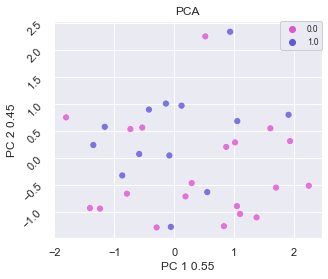

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



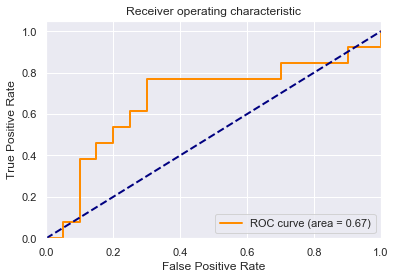

[[18  2]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.67      0.31      0.42        13

    accuracy                           0.67        33
   macro avg       0.67      0.60      0.59        33
weighted avg       0.67      0.67      0.63        33

Training set score for Logistic Regression: 0.684615
Testing  set score for Logistic Regression: 0.666667
Best score for training data: 0.6230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



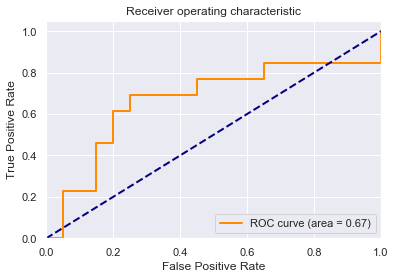

[[19  1]
 [10  3]]


              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.75      0.23      0.35        13

    accuracy                           0.67        33
   macro avg       0.70      0.59      0.56        33
weighted avg       0.69      0.67      0.61        33

Training set score for SVM: 0.730769
Testing  set score for SVM: 0.666667
Best score for training data: 0.5923076923076923 

Best #estimators: 100 

Best max depth: 12 



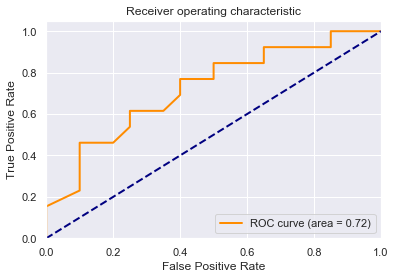

[[15  5]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.58      0.54      0.56        13

    accuracy                           0.67        33
   macro avg       0.65      0.64      0.65        33
weighted avg       0.66      0.67      0.66        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


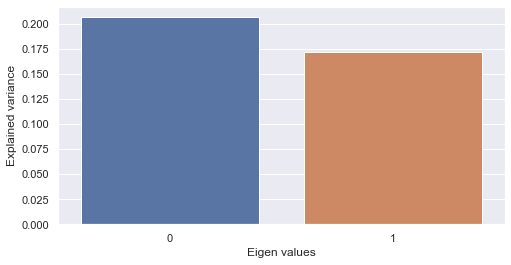

PCA on single-modal explained variance ratio: 0.3779188394546509


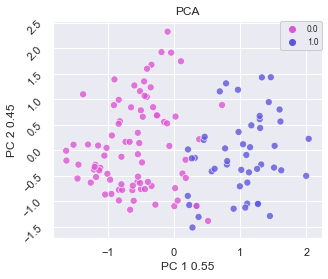

2 clusters -  silhoutte score: 0.18783870339393616 - mutual information: 0.0002557917778618253
3 clusters -  silhoutte score: 0.17649632692337036 - mutual information: 0.01504396386600918
4 clusters -  silhoutte score: 0.18348222970962524 - mutual information: 0.009652284798030554


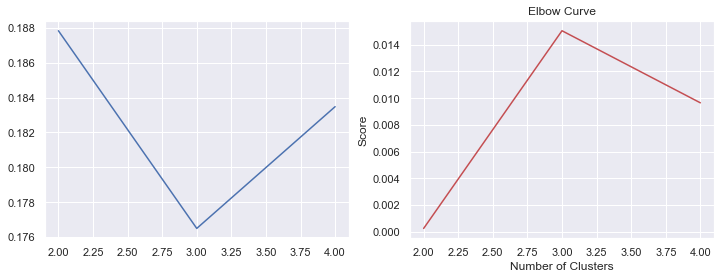

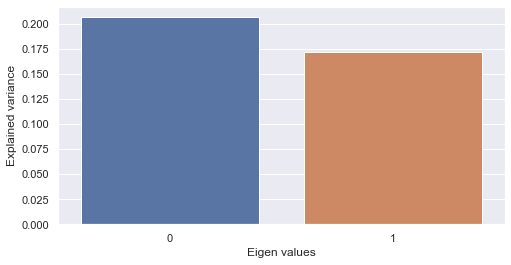

PCA on single-modal explained variance ratio: 0.3779188394546509


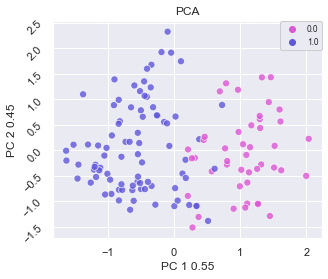

2 clusters -  silhoutte score: 0.18561029434204102 - mutual information: 9.829388254474276e-05
3 clusters -  silhoutte score: 0.18208424746990204 - mutual information: 0.0010606829922915162
4 clusters -  silhoutte score: 0.17998215556144714 - mutual information: 0.02910140722168851


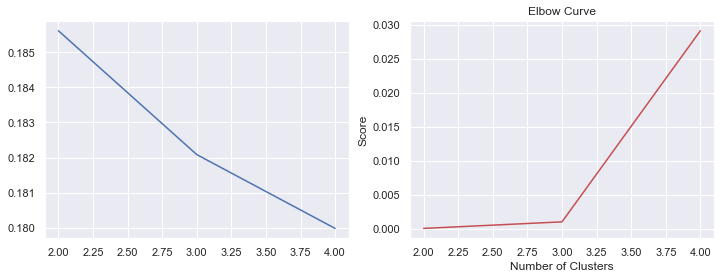

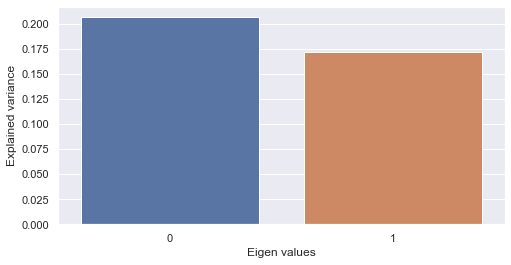

PCA on single-modal explained variance ratio: 0.3779188394546509


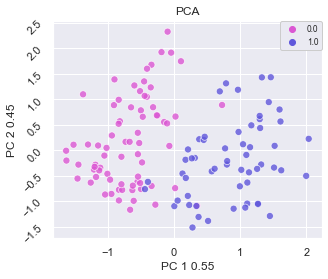

2 clusters -  silhoutte score: 0.1662828028202057 - mutual information: 0.0036743419773889764
3 clusters -  silhoutte score: 0.14641503989696503 - mutual information: 0.013994249862495148
4 clusters -  silhoutte score: 0.17862246930599213 - mutual information: 0.012638518730252379


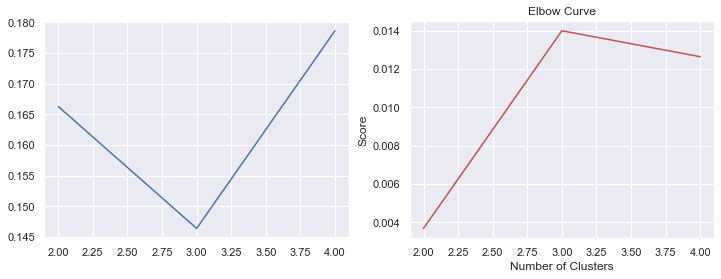

Compression: 105.93

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00069: early stopping


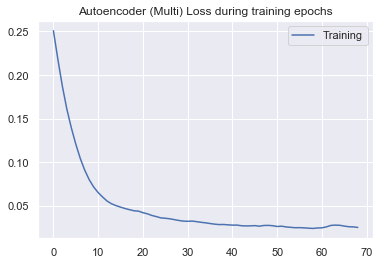

0.025560784082000073


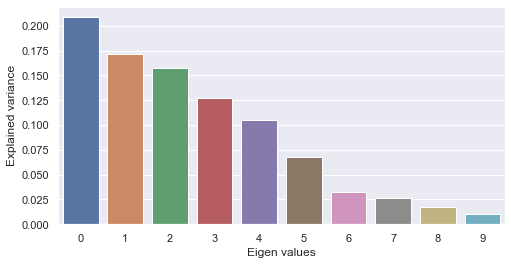

PCA on single-modal explained variance ratio: 0.9254763722419739


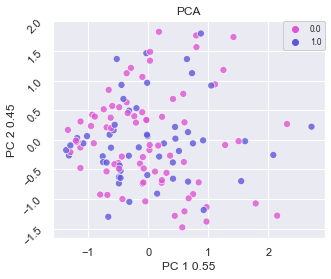

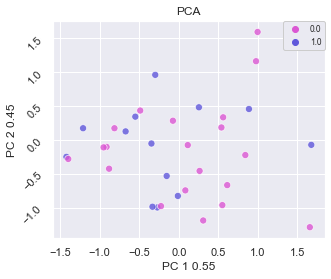

Results for AE: 

Best score for training data: 0.6692307692307693 

Best C: 0.08 



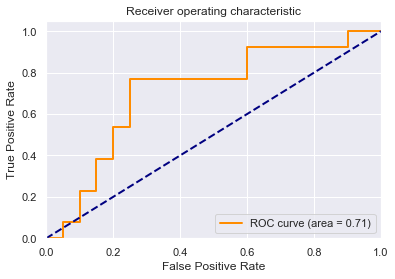

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.715385
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6307692307692309 

Best C: 1.0 

Best Gamma: 0.1 



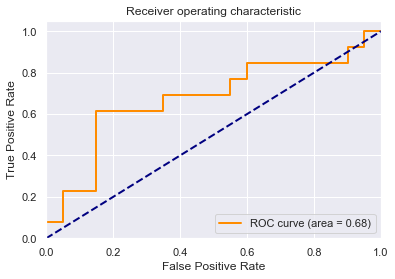

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for SVM: 0.730769
Testing  set score for SVM: 0.606061
Best score for training data: 0.5692307692307692 

Best #estimators: 140 

Best max depth: None 



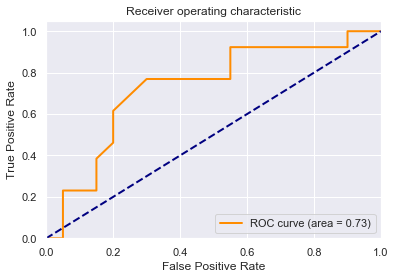

[[18  2]
 [10  3]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.60      0.23      0.33        13

    accuracy                           0.64        33
   macro avg       0.62      0.57      0.54        33
weighted avg       0.63      0.64      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


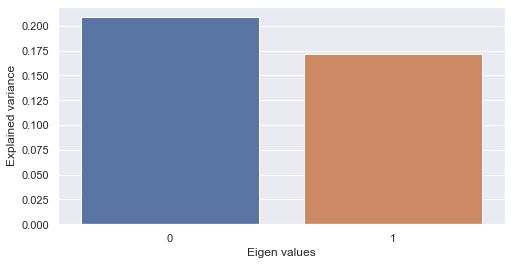

PCA on single-modal explained variance ratio: 0.38012009859085083


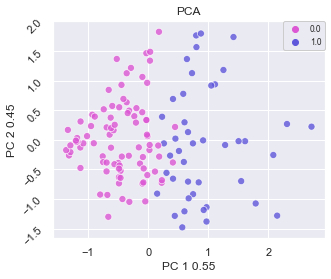

2 clusters -  silhoutte score: 0.18565571308135986 - mutual information: 0.00018569976750776966
3 clusters -  silhoutte score: 0.14919275045394897 - mutual information: 0.009756577883437685
4 clusters -  silhoutte score: 0.16315439343452454 - mutual information: 0.010250838289950548


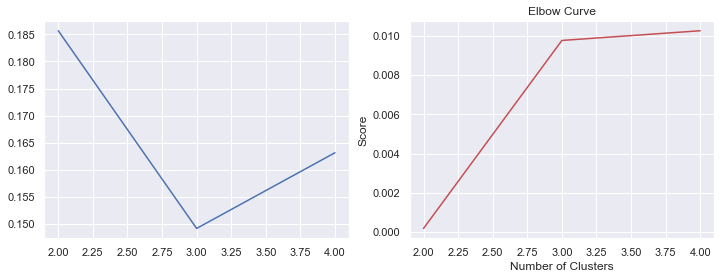

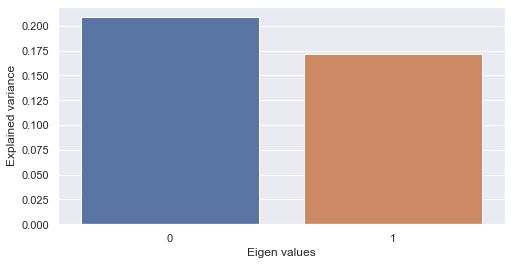

PCA on single-modal explained variance ratio: 0.38012009859085083


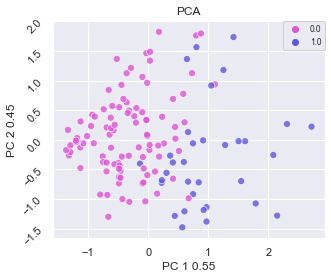

2 clusters -  silhoutte score: 0.1860198974609375 - mutual information: 0.002219736319528823
3 clusters -  silhoutte score: 0.15381307899951935 - mutual information: 0.009840223169859535
4 clusters -  silhoutte score: 0.1419074386358261 - mutual information: 0.008590528874835314


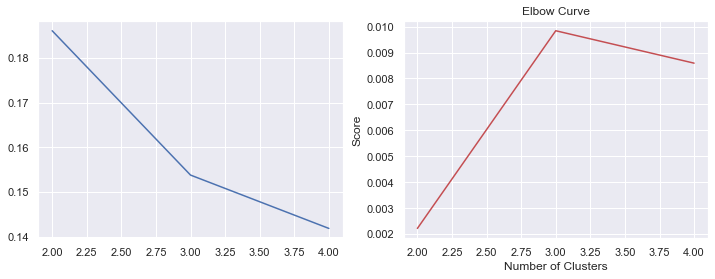

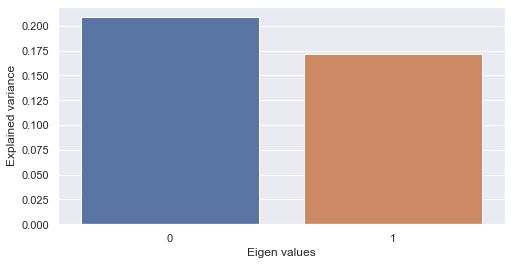

PCA on single-modal explained variance ratio: 0.38012009859085083


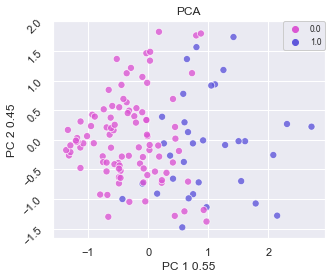

2 clusters -  silhoutte score: 0.18617618083953857 - mutual information: 0.002219736319528823
3 clusters -  silhoutte score: 0.15106956660747528 - mutual information: 0.0017807953764831126
4 clusters -  silhoutte score: 0.1269649714231491 - mutual information: 0.01614632937108561


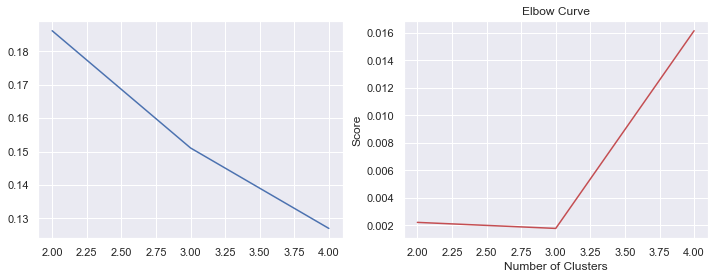

Compression: 105.93

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00077: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00102: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
Epoch 00102: early stopping


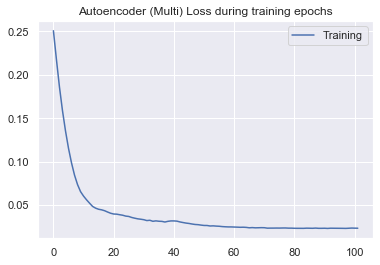

0.023294393689586565


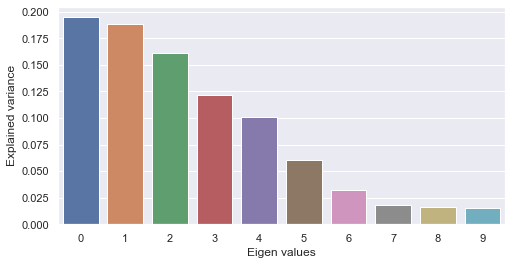

PCA on single-modal explained variance ratio: 0.908912181854248


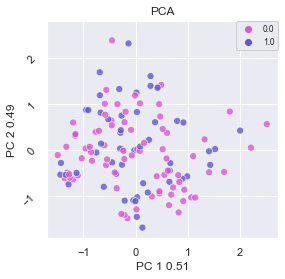

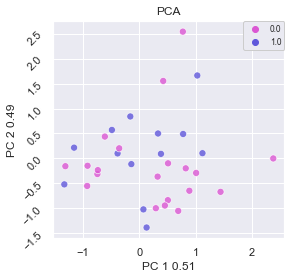

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



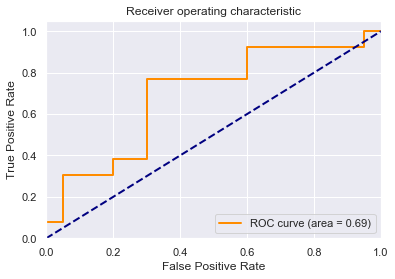

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.661538
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6153846153846154 

Best C: 1.0 

Best Gamma: 0.1 



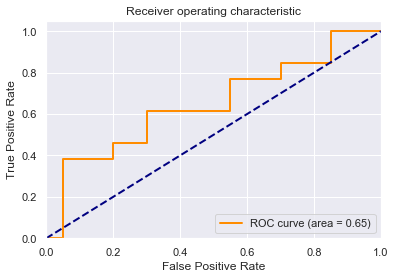

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for SVM: 0.700000
Testing  set score for SVM: 0.606061
Best score for training data: 0.5769230769230769 

Best #estimators: 140 

Best max depth: None 



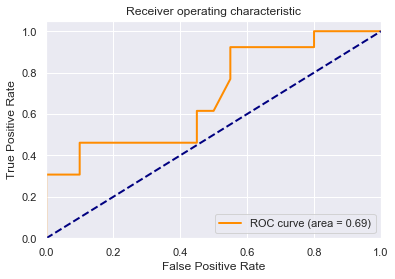

[[18  2]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.67      0.31      0.42        13

    accuracy                           0.67        33
   macro avg       0.67      0.60      0.59        33
weighted avg       0.67      0.67      0.63        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.666667


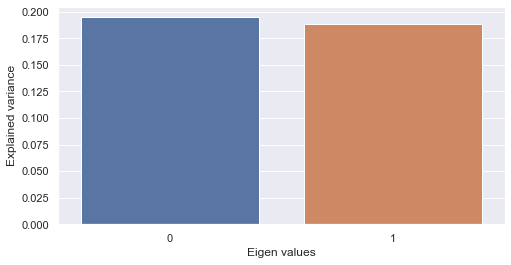

PCA on single-modal explained variance ratio: 0.38281863927841187


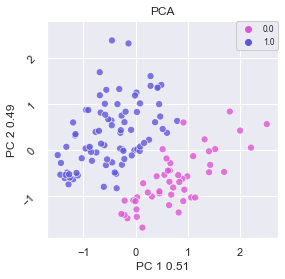

2 clusters -  silhoutte score: 0.17262329161167145 - mutual information: 0.0010799519777476342
3 clusters -  silhoutte score: 0.1713290810585022 - mutual information: 0.0009119738416974406
4 clusters -  silhoutte score: 0.17141938209533691 - mutual information: 0.00427068706874373


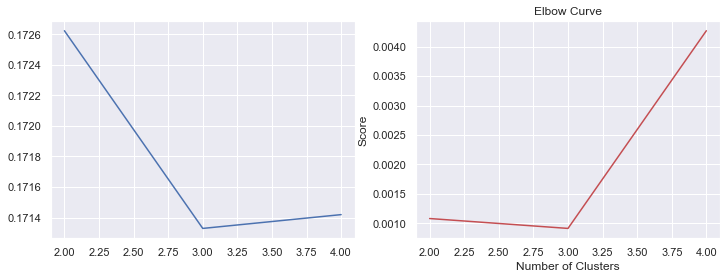

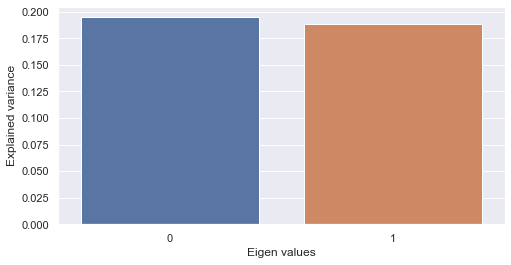

PCA on single-modal explained variance ratio: 0.38281863927841187


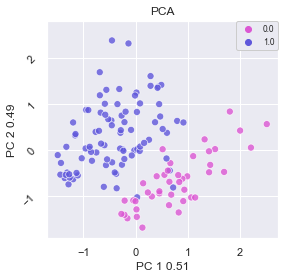

2 clusters -  silhoutte score: 0.16744364798069 - mutual information: 0.0019895710553571606
3 clusters -  silhoutte score: 0.16442090272903442 - mutual information: 0.017041665690250975
4 clusters -  silhoutte score: 0.14429330825805664 - mutual information: 0.03130346344091923


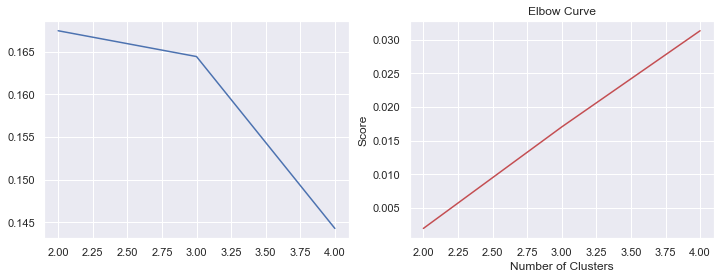

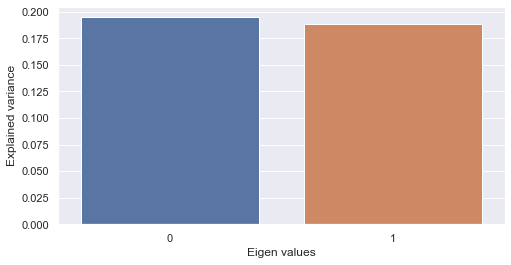

PCA on single-modal explained variance ratio: 0.38281863927841187


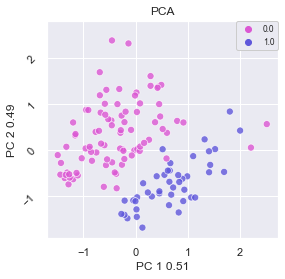

2 clusters -  silhoutte score: 0.15390074253082275 - mutual information: 0.00023832000213391697
3 clusters -  silhoutte score: 0.14931899309158325 - mutual information: 0.01679197131129137
4 clusters -  silhoutte score: 0.16574642062187195 - mutual information: 0.015966057376950893


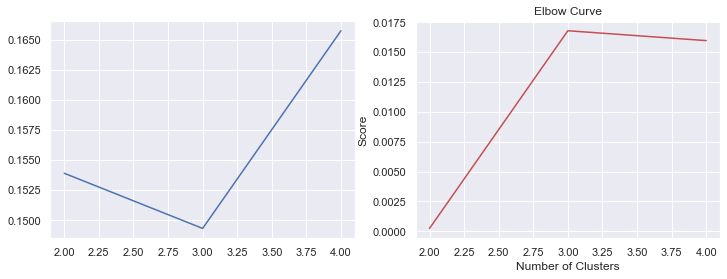

Compression: 105.93

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00103: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 00108: early stopping


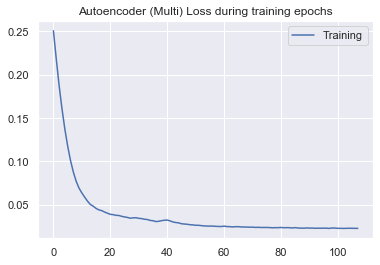

0.022742814742601834


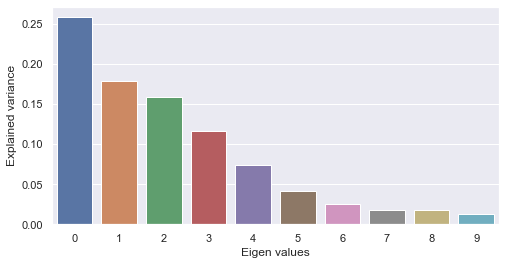

PCA on single-modal explained variance ratio: 0.9007468223571777


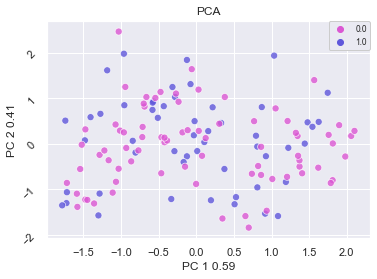

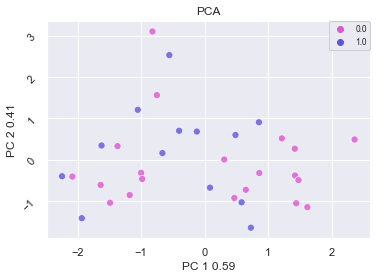

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



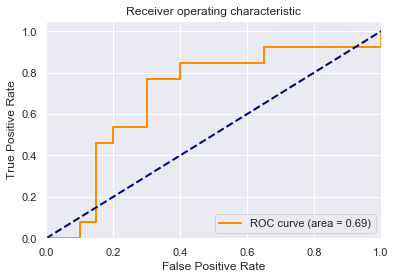

[[18  2]
 [13  0]]


              precision    recall  f1-score   support

           0       0.58      0.90      0.71        20
           1       0.00      0.00      0.00        13

    accuracy                           0.55        33
   macro avg       0.29      0.45      0.35        33
weighted avg       0.35      0.55      0.43        33

Training set score for Logistic Regression: 0.653846
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6 

Best C: 1.0 

Best Gamma: 0.1 



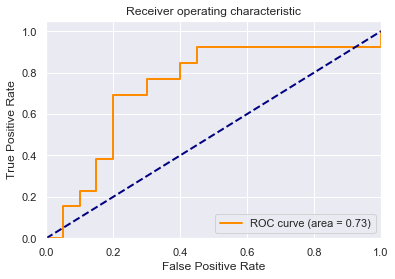

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for SVM: 0.700000
Testing  set score for SVM: 0.606061
Best score for training data: 0.5615384615384615 

Best #estimators: 140 

Best max depth: None 



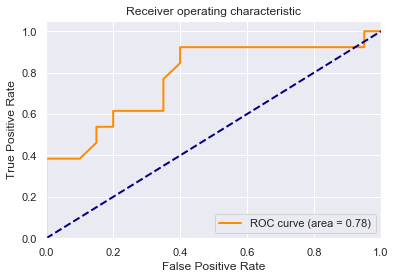

[[16  4]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.64      0.54      0.58        13

    accuracy                           0.70        33
   macro avg       0.68      0.67      0.67        33
weighted avg       0.69      0.70      0.69        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970


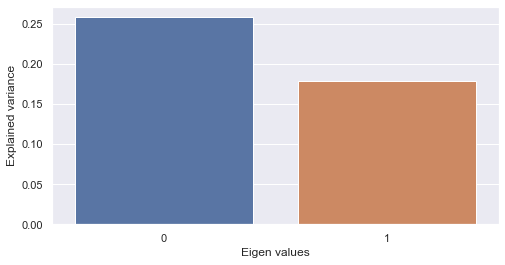

PCA on single-modal explained variance ratio: 0.4359813630580902


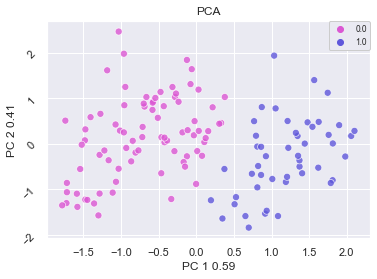

2 clusters -  silhoutte score: 0.2131834477186203 - mutual information: 0.0002557917778618253
3 clusters -  silhoutte score: 0.18561038374900818 - mutual information: 0.019993106052765695
4 clusters -  silhoutte score: 0.17319563031196594 - mutual information: 0.04804514776290962


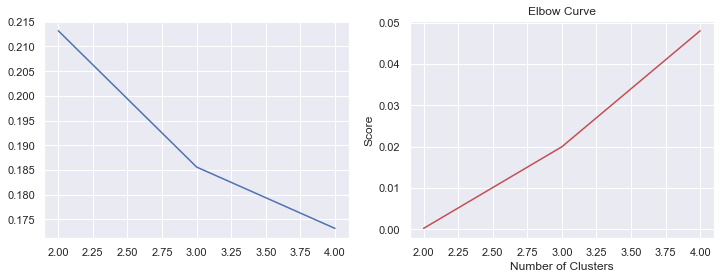

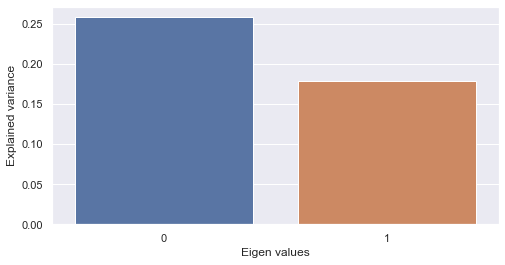

PCA on single-modal explained variance ratio: 0.4359813630580902


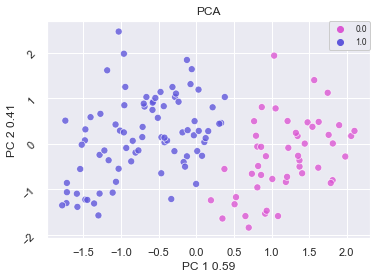

2 clusters -  silhoutte score: 0.2131834477186203 - mutual information: 0.0002557917778618253
3 clusters -  silhoutte score: 0.1494363695383072 - mutual information: 0.009132286664253718
4 clusters -  silhoutte score: 0.13630951941013336 - mutual information: 0.008425127119503214


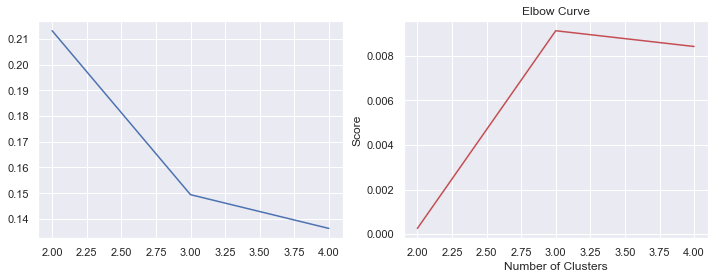

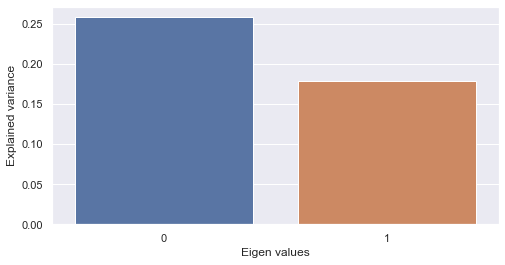

PCA on single-modal explained variance ratio: 0.4359813630580902


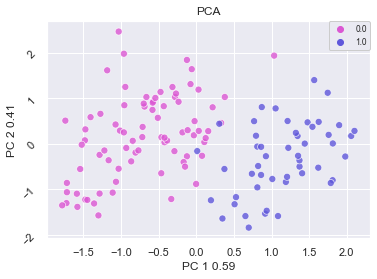

2 clusters -  silhoutte score: 0.20628368854522705 - mutual information: 0.0007455934845754247
3 clusters -  silhoutte score: 0.14500127732753754 - mutual information: 0.000995721941924077
4 clusters -  silhoutte score: 0.15626080334186554 - mutual information: 0.0036603523700486154


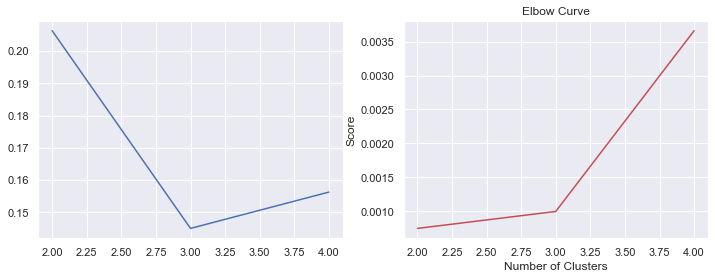

Compression: 105.93

Epoch 00053: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00094: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00106: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00106: early stopping


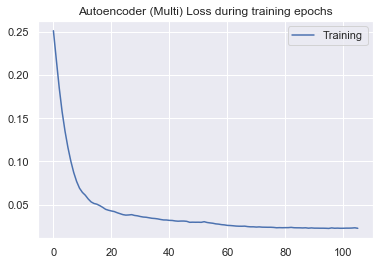

0.022662708105949256


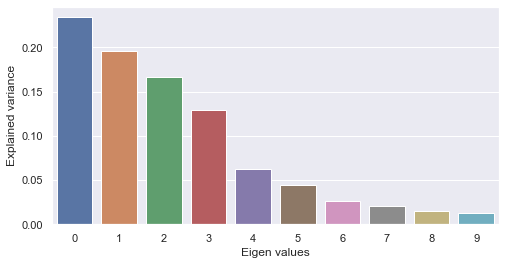

PCA on single-modal explained variance ratio: 0.9075914025306702


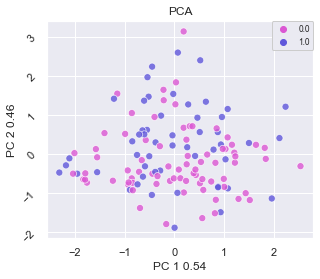

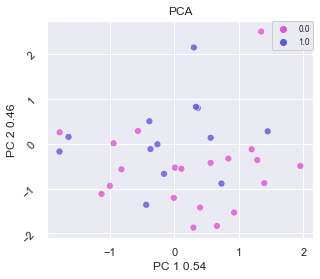

Results for AE: 

Best score for training data: 0.623076923076923 

Best C: 0.08 



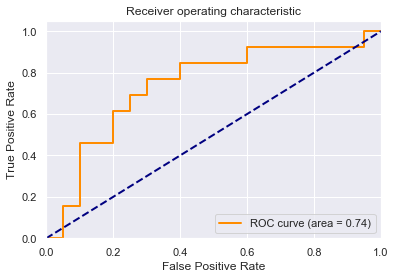

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



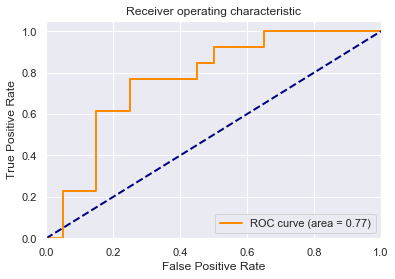

[[19  1]
 [10  3]]


              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.75      0.23      0.35        13

    accuracy                           0.67        33
   macro avg       0.70      0.59      0.56        33
weighted avg       0.69      0.67      0.61        33

Training set score for SVM: 0.700000
Testing  set score for SVM: 0.666667
Best score for training data: 0.6 

Best #estimators: 100 

Best max depth: 12 



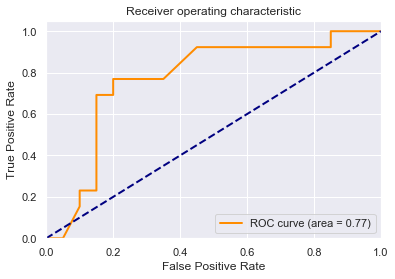

[[17  3]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.57      0.31      0.40        13

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


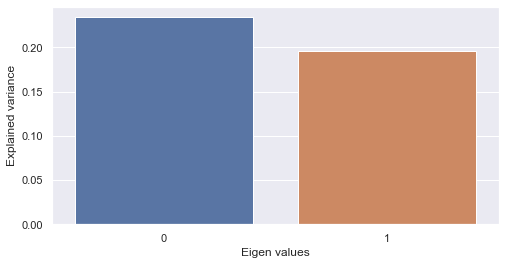

PCA on single-modal explained variance ratio: 0.43013036251068115


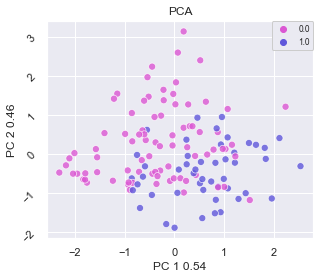

2 clusters -  silhoutte score: 0.16915260255336761 - mutual information: 0.0019493179863402832
3 clusters -  silhoutte score: 0.16081756353378296 - mutual information: 0.024462932664580748
4 clusters -  silhoutte score: 0.1861926168203354 - mutual information: 0.013311050489907661


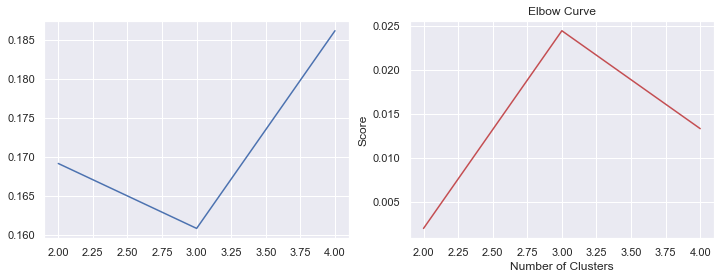

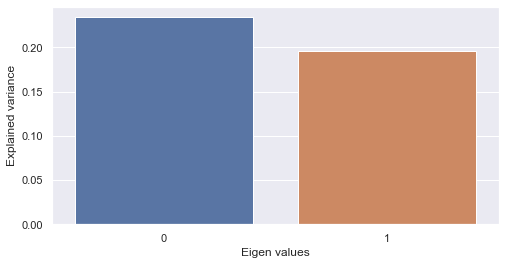

PCA on single-modal explained variance ratio: 0.43013036251068115


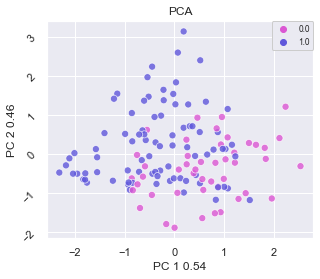

2 clusters -  silhoutte score: 0.17078052461147308 - mutual information: 0.0004603191369141832
3 clusters -  silhoutte score: 0.17279554903507233 - mutual information: 0.014495981667391682
4 clusters -  silhoutte score: 0.145717054605484 - mutual information: 0.012662686152818724


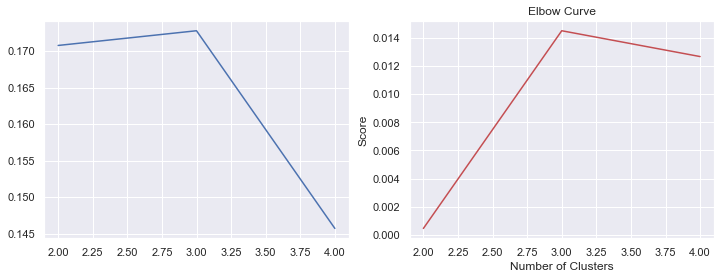

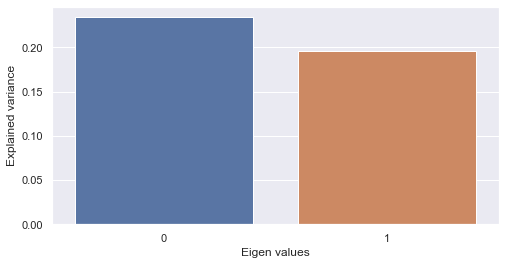

PCA on single-modal explained variance ratio: 0.43013036251068115


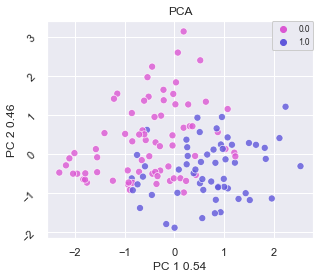

2 clusters -  silhoutte score: 0.1546078622341156 - mutual information: 4.157461393544474e-05
3 clusters -  silhoutte score: 0.13995985686779022 - mutual information: 0.011541274696965819
4 clusters -  silhoutte score: 0.1594746857881546 - mutual information: 0.009858213128872473


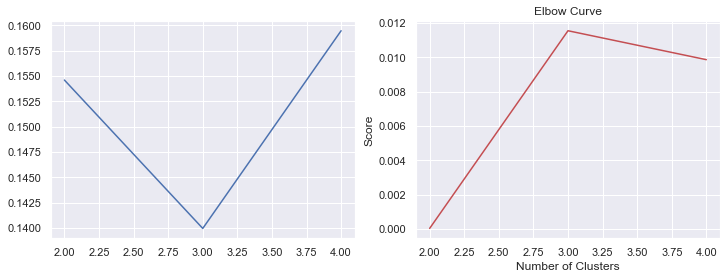

Compression: 105.93

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00092: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00105: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00112: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00117: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00122: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.
Epoch 00123: early stopping


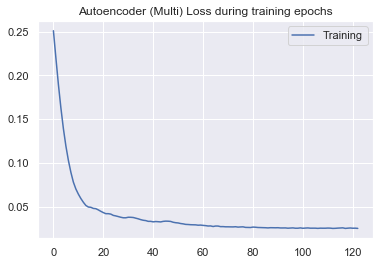

0.024980541605215806


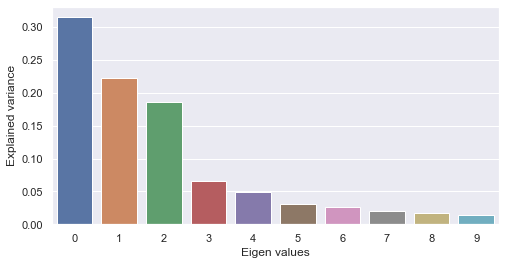

PCA on single-modal explained variance ratio: 0.9481909871101379


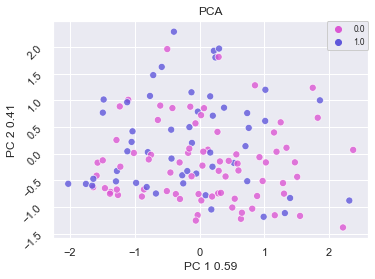

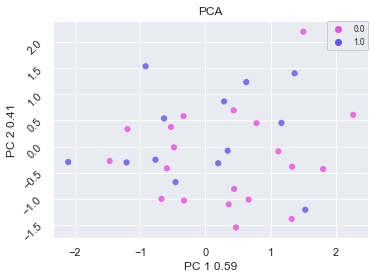

Results for AE: 

Best score for training data: 0.6307692307692306 

Best C: 0.08 



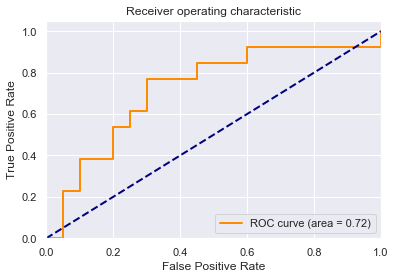

[[18  2]
 [10  3]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.60      0.23      0.33        13

    accuracy                           0.64        33
   macro avg       0.62      0.57      0.54        33
weighted avg       0.63      0.64      0.59        33

Training set score for Logistic Regression: 0.653846
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.6230769230769231 

Best C: 1.0 

Best Gamma: 0.1 



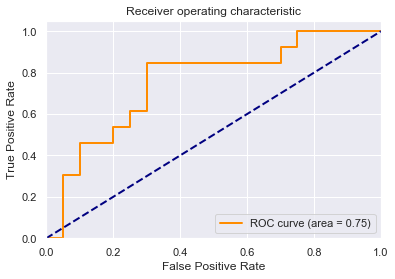

[[19  1]
 [11  2]]


              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.67      0.15      0.25        13

    accuracy                           0.64        33
   macro avg       0.65      0.55      0.50        33
weighted avg       0.65      0.64      0.56        33

Training set score for SVM: 0.669231
Testing  set score for SVM: 0.636364
Best score for training data: 0.5923076923076922 

Best #estimators: 100 

Best max depth: 12 



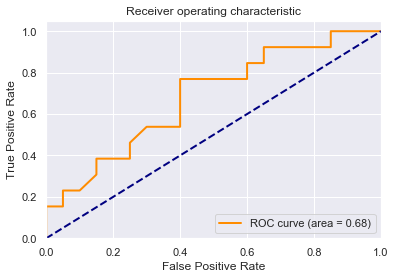

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061


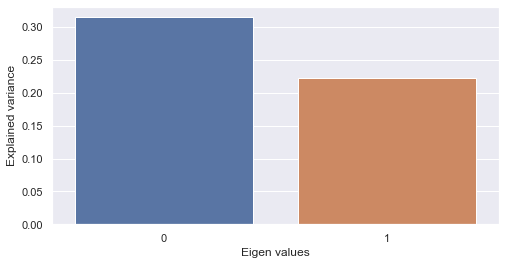

PCA on single-modal explained variance ratio: 0.5379891991615295


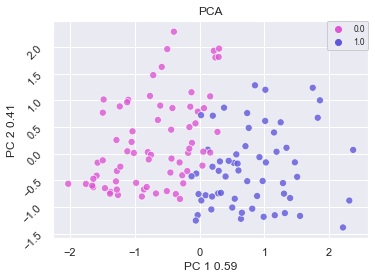

2 clusters -  silhoutte score: 0.19991053640842438 - mutual information: 0.021726669365613148
3 clusters -  silhoutte score: 0.20333388447761536 - mutual information: 0.06064177241763842
4 clusters -  silhoutte score: 0.22193148732185364 - mutual information: 0.03989345805568923


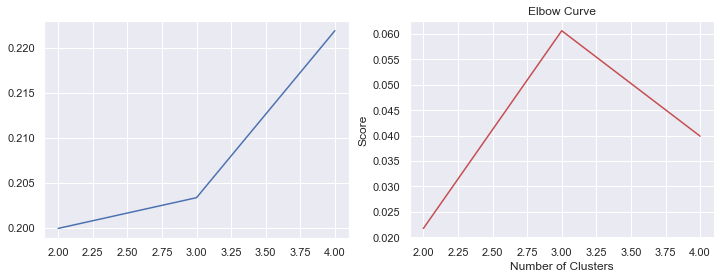

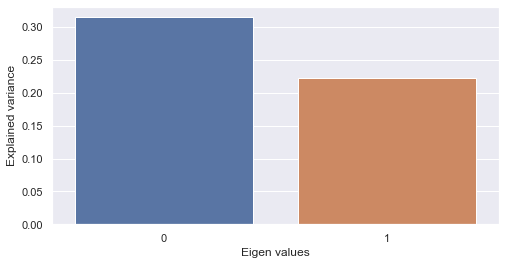

PCA on single-modal explained variance ratio: 0.5379891991615295


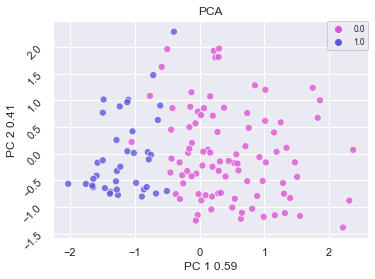

2 clusters -  silhoutte score: 0.1872585564851761 - mutual information: 0.002092693275675019
3 clusters -  silhoutte score: 0.2130221277475357 - mutual information: 0.041535721273404144
4 clusters -  silhoutte score: 0.20083671808242798 - mutual information: 0.05188662561137603


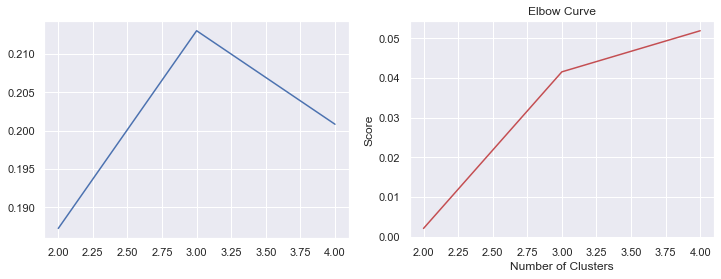

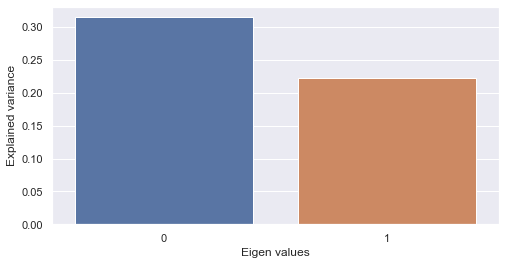

PCA on single-modal explained variance ratio: 0.5379891991615295


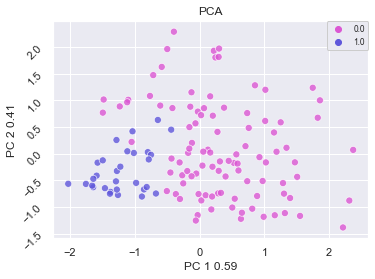

2 clusters -  silhoutte score: 0.14229010045528412 - mutual information: 0.000668785402026461
3 clusters -  silhoutte score: 0.1764984130859375 - mutual information: 0.03105011918880957
4 clusters -  silhoutte score: 0.18903011083602905 - mutual information: 0.0283702092876208


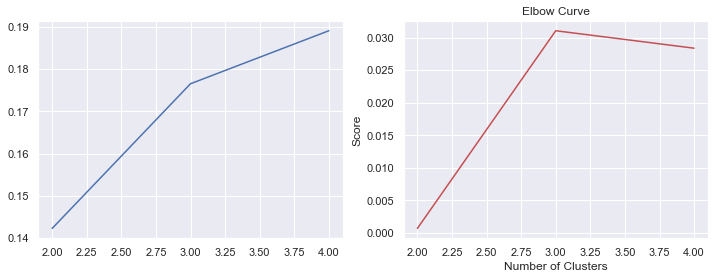

Compression: 105.93

Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00102: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00107: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 00107: early stopping


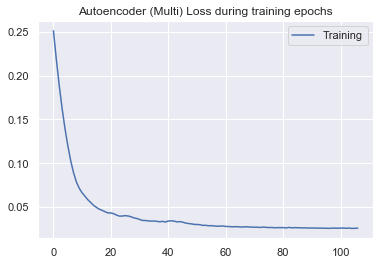

0.025760495891937844


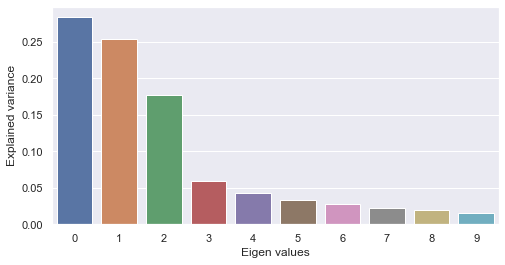

PCA on single-modal explained variance ratio: 0.934449315071106


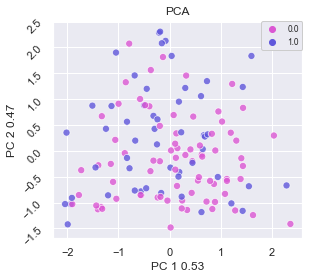

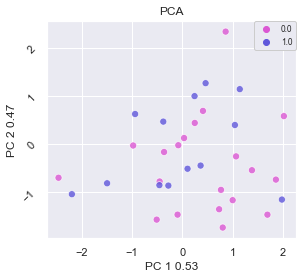

Results for AE: 

Best score for training data: 0.623076923076923 

Best C: 0.08 



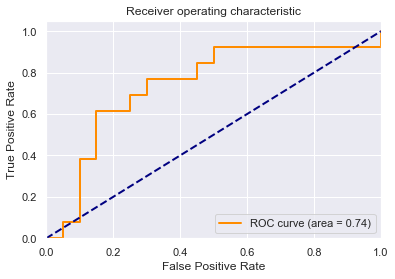

[[18  2]
 [12  1]]


              precision    recall  f1-score   support

           0       0.60      0.90      0.72        20
           1       0.33      0.08      0.12        13

    accuracy                           0.58        33
   macro avg       0.47      0.49      0.42        33
weighted avg       0.49      0.58      0.49        33

Training set score for Logistic Regression: 0.646154
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.623076923076923 

Best C: 1.0 

Best Gamma: 0.1 



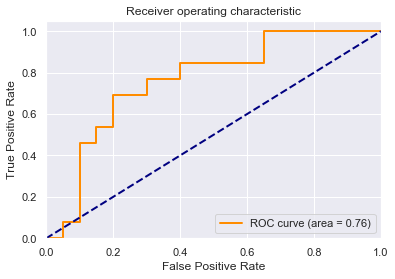

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for SVM: 0.653846
Testing  set score for SVM: 0.606061
Best score for training data: 0.623076923076923 

Best #estimators: 100 

Best max depth: 12 



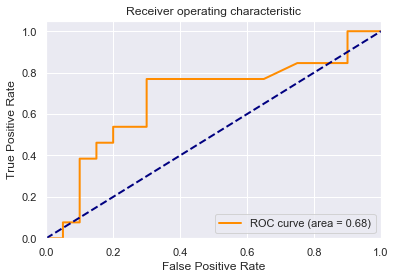

[[17  3]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.67      0.46      0.55        13

    accuracy                           0.70        33
   macro avg       0.69      0.66      0.66        33
weighted avg       0.69      0.70      0.68        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.696970


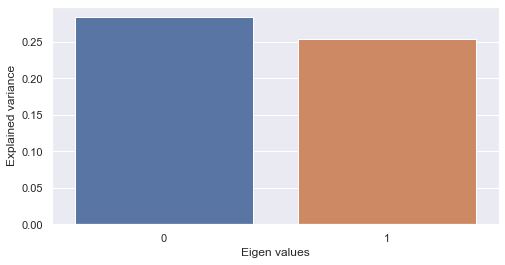

PCA on single-modal explained variance ratio: 0.5373845100402832


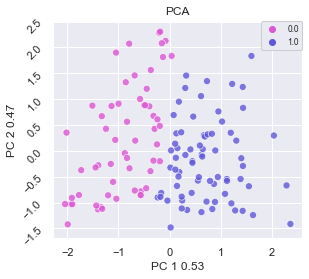

2 clusters -  silhoutte score: 0.1954345852136612 - mutual information: 0.02943602039858929
3 clusters -  silhoutte score: 0.22402702271938324 - mutual information: 0.03718244377531882
4 clusters -  silhoutte score: 0.21337375044822693 - mutual information: 0.030197433792225017


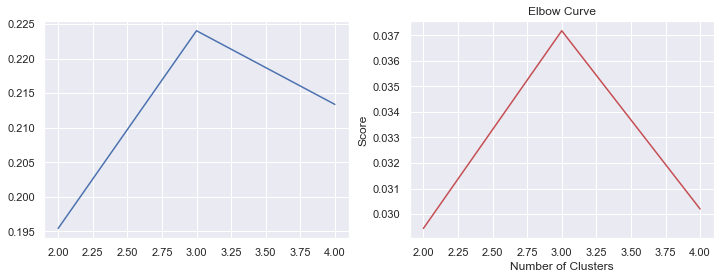

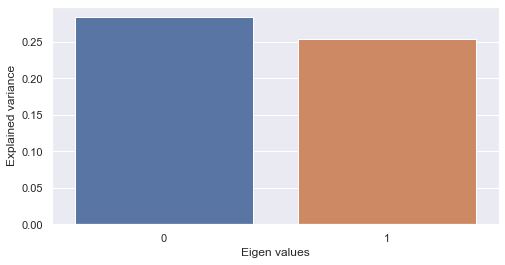

PCA on single-modal explained variance ratio: 0.5373845100402832


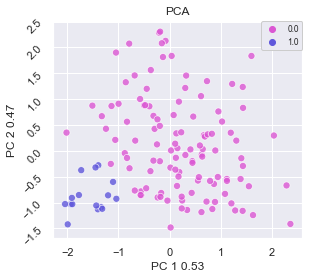

2 clusters -  silhoutte score: 0.19170716404914856 - mutual information: 0.0005968583477829127
3 clusters -  silhoutte score: 0.19585692882537842 - mutual information: 0.02084014354630624
4 clusters -  silhoutte score: 0.1740938276052475 - mutual information: 0.028329106802148084


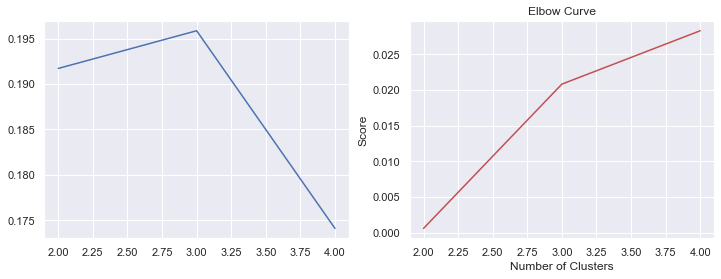

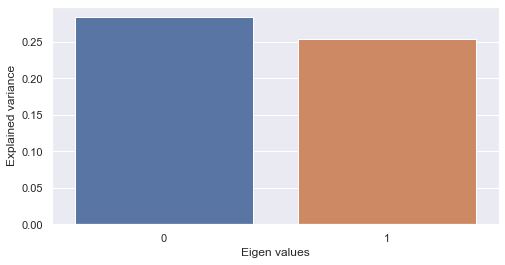

PCA on single-modal explained variance ratio: 0.5373845100402832


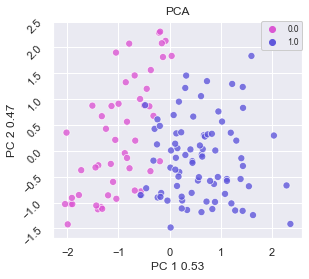

2 clusters -  silhoutte score: 0.19922327995300293 - mutual information: 0.028170930503696373
3 clusters -  silhoutte score: 0.20398648083209991 - mutual information: 0.02990911436291332
4 clusters -  silhoutte score: 0.19166134297847748 - mutual information: 0.02590419956641593


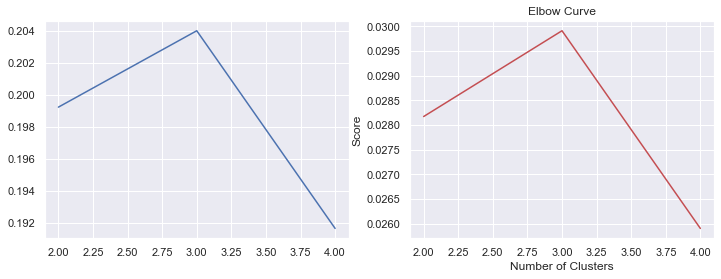

Compression: 105.93

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 00046: early stopping


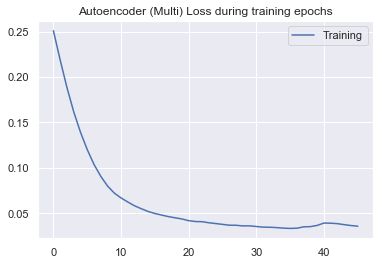

0.03575024696496817


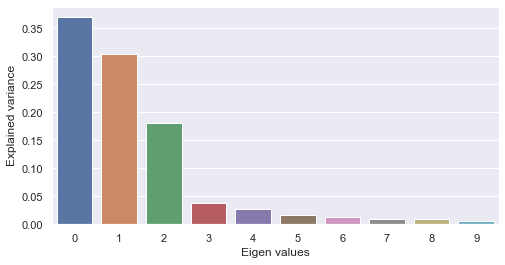

PCA on single-modal explained variance ratio: 0.9734402894973755


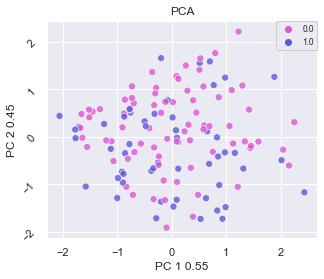

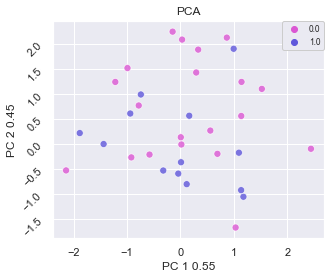

Results for AE: 

Best score for training data: 0.6384615384615383 

Best C: 0.08 



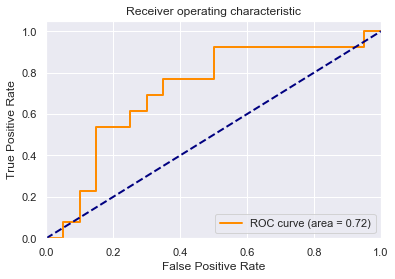

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.638462
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.5999999999999999 

Best C: 1.0 

Best Gamma: 0.1 



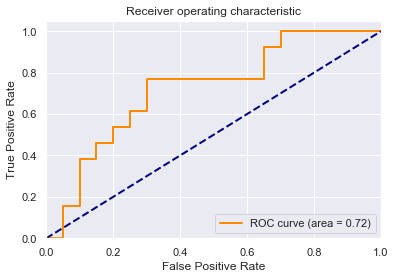

[[18  2]
 [11  2]]


              precision    recall  f1-score   support

           0       0.62      0.90      0.73        20
           1       0.50      0.15      0.24        13

    accuracy                           0.61        33
   macro avg       0.56      0.53      0.48        33
weighted avg       0.57      0.61      0.54        33

Training set score for SVM: 0.646154
Testing  set score for SVM: 0.606061
Best score for training data: 0.6 

Best #estimators: 100 

Best max depth: 12 



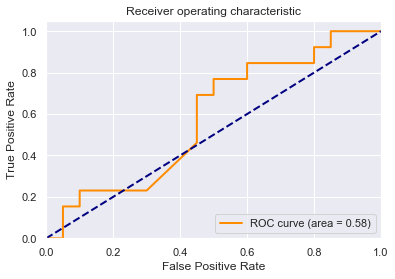

[[19  1]
 [11  2]]


              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.67      0.15      0.25        13

    accuracy                           0.64        33
   macro avg       0.65      0.55      0.50        33
weighted avg       0.65      0.64      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364


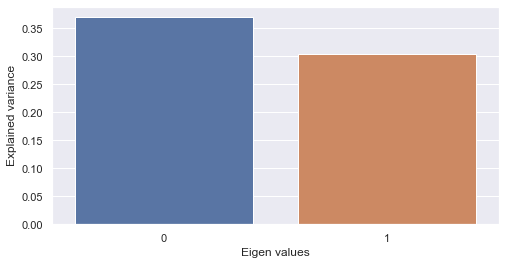

PCA on single-modal explained variance ratio: 0.6743160486221313


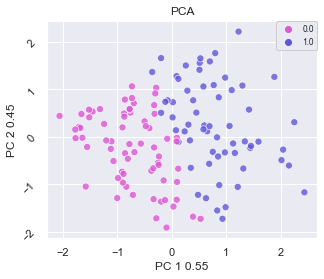

2 clusters -  silhoutte score: 0.22825473546981812 - mutual information: 0.0037289571220810833
3 clusters -  silhoutte score: 0.24963372945785522 - mutual information: 0.009001393360269524
4 clusters -  silhoutte score: 0.275957316160202 - mutual information: 0.015677862145718206


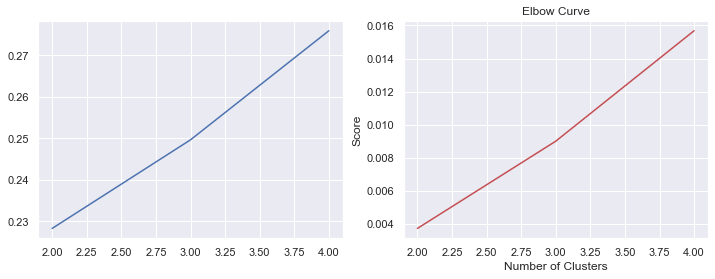

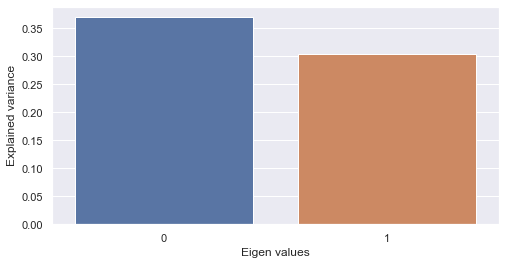

PCA on single-modal explained variance ratio: 0.6743160486221313


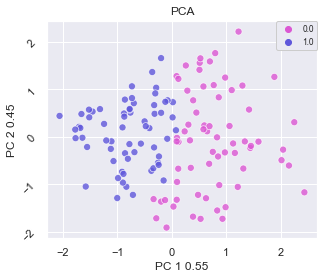

2 clusters -  silhoutte score: 0.21977651119232178 - mutual information: 0.0012402536958197512
3 clusters -  silhoutte score: 0.23030592501163483 - mutual information: 0.021730430799439263
4 clusters -  silhoutte score: 0.2235802561044693 - mutual information: 0.026248766892699595


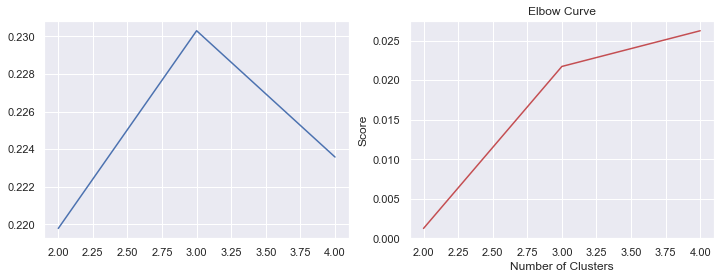

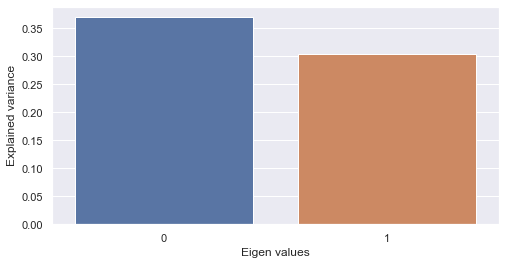

PCA on single-modal explained variance ratio: 0.6743160486221313


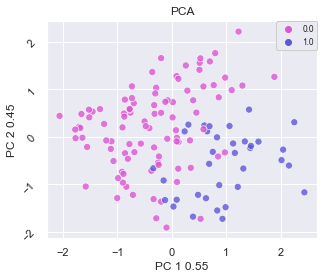

2 clusters -  silhoutte score: 0.2027178257703781 - mutual information: 0.000526849824188075
3 clusters -  silhoutte score: 0.19461491703987122 - mutual information: 0.014170221839476594
4 clusters -  silhoutte score: 0.22176340222358704 - mutual information: 0.012559531368724999


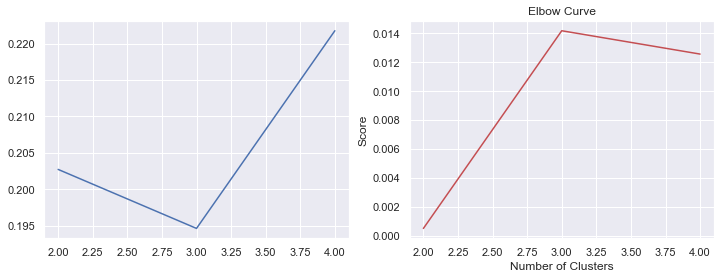

Compression: 105.93

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00113: early stopping


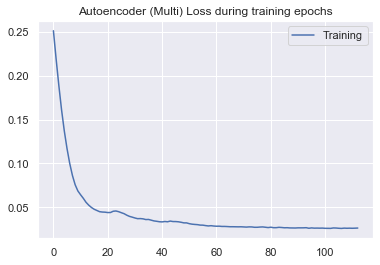

0.02644930321436662


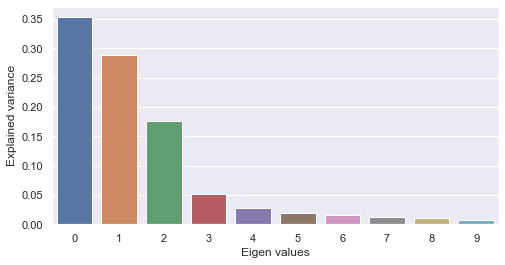

PCA on single-modal explained variance ratio: 0.9637771844863892


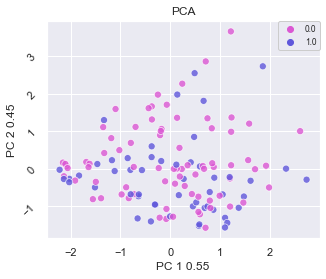

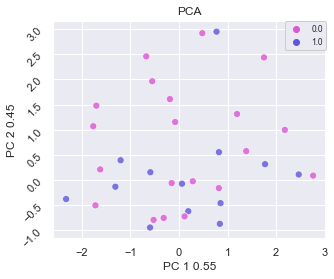

Results for AE: 

Best score for training data: 0.6076923076923076 

Best C: 0.08 



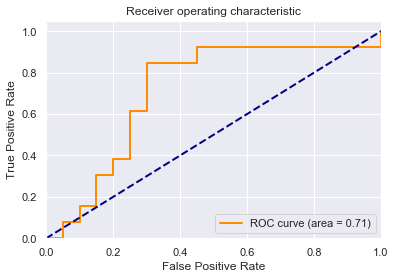

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for Logistic Regression: 0.623077
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.5923076923076923 

Best C: 0.1 

Best Gamma: scale 



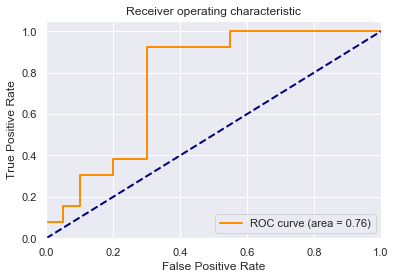

[[20  0]
 [13  0]]


              precision    recall  f1-score   support

           0       0.61      1.00      0.75        20
           1       0.00      0.00      0.00        13

    accuracy                           0.61        33
   macro avg       0.30      0.50      0.38        33
weighted avg       0.37      0.61      0.46        33

Training set score for SVM: 0.592308
Testing  set score for SVM: 0.606061


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.5538461538461539 

Best #estimators: 100 

Best max depth: 12 



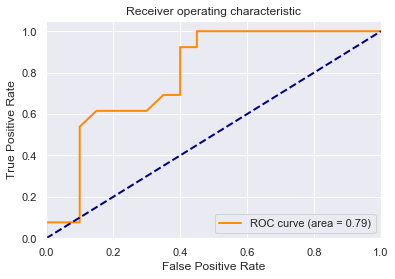

[[18  2]
 [ 6  7]]


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.78      0.54      0.64        13

    accuracy                           0.76        33
   macro avg       0.76      0.72      0.73        33
weighted avg       0.76      0.76      0.75        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.757576


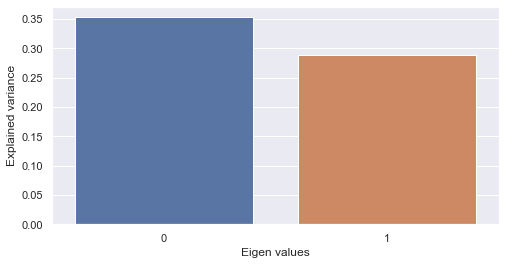

PCA on single-modal explained variance ratio: 0.6418483257293701


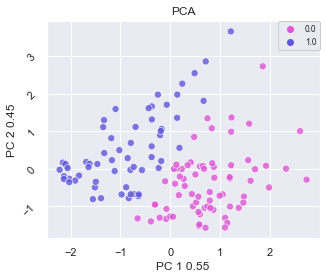

2 clusters -  silhoutte score: 0.24230167269706726 - mutual information: 0.004384609480834167
3 clusters -  silhoutte score: 0.27793294191360474 - mutual information: 0.012523858937498002
4 clusters -  silhoutte score: 0.2733546197414398 - mutual information: 0.021937175019883258


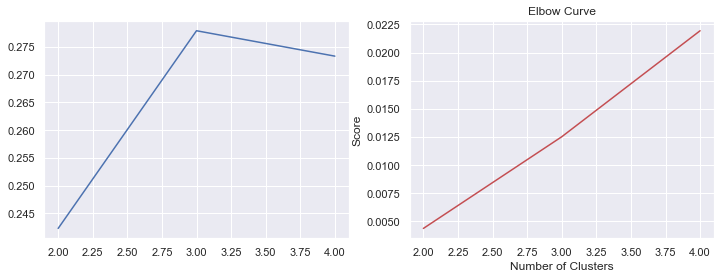

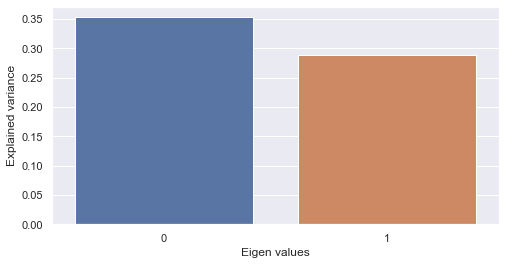

PCA on single-modal explained variance ratio: 0.6418483257293701


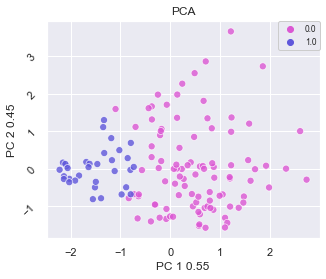

2 clusters -  silhoutte score: 0.2163141965866089 - mutual information: 0.00021498047633589874
3 clusters -  silhoutte score: 0.2560283839702606 - mutual information: 0.009025079631588986
4 clusters -  silhoutte score: 0.17160744965076447 - mutual information: 0.0011721653155044257


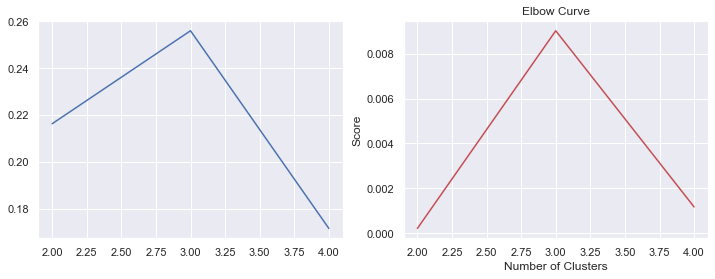

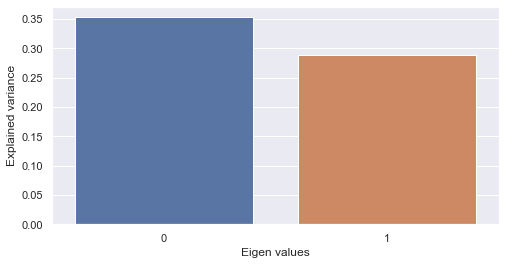

PCA on single-modal explained variance ratio: 0.6418483257293701


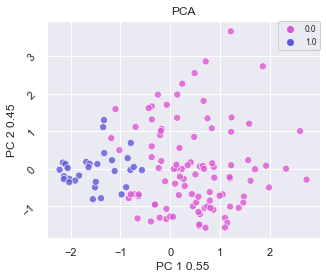

2 clusters -  silhoutte score: 0.20827354490756989 - mutual information: 0.00014365999136170277
3 clusters -  silhoutte score: 0.23579691350460052 - mutual information: 0.00530558340867529
4 clusters -  silhoutte score: 0.23830270767211914 - mutual information: 0.004191865460854541


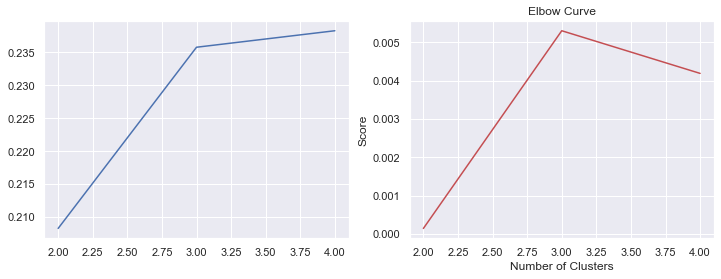

In [8]:
###  Hyperparameter tuning
encoding_dims=[100]
mus=[0.1]
dropouts = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
l1s = [0.000005]
l2s = [0.0000035]
scores = []
for encoding_dim in encoding_dims:
    for mu in mus:
        for dropout in dropouts:
            for l1 in l1s:
                for l2 in l2s:
                    ## Build and Train Autoencoder
                    autoencoder, encoder, decoder, loss = Models.build_and_train_multi_autoencoder([X_swapped_first_norm,X_swapped_second_norm],
                                                                                  [X_train_first_norm,X_train_second_norm],
                                                                                  encoding_dim=encoding_dim, 
                                                                                  regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                                  dropout=dropout,
                                                                                  epochs=200,
                                                                                  mu=mu)
                    ## Encode datasets
                    X_latent_multi_dae = Models.encode_dataset([X_train_first_norm,X_train_second_norm], encoder)
                    X_latent_test_multi_dae = Models.encode_dataset([X_test_first_norm,X_test_second_norm], encoder)

                    ## PCA ON AUTOENCODER LATENT SPACE
                    X_latent_pca_ae, X_latent_test_pca_ae = Models.perform_PCA(X_latent_multi_dae,y_train, X_latent_test_multi_dae, y_test, n_components=10)

                    ### CLASSIFICATION ###
                    classify = Models.classify(X_latent_multi_dae, X_latent_test_multi_dae, np.ravel(y_train), np.ravel(y_test), model_type="AE")

                    ### CLUSTERING ###
                    clustering = Models.cluster(X_latent_multi_dae,np.ravel(y_train), model_type="AE")

                    scores.append([mu,dropout,l1,l2,loss] + classify + clustering)

In [4]:
scores = pd.DataFrame(scores,
                      columns=["mu","dropout","l1","l2","loss","LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
scores

mu  dropout        l1        l2      loss  LR accuracy  SVM accuracy  \
0  0.1     0.00  0.000005  0.000003  0.021313     0.606061      0.636364   
1  0.1     0.05  0.000005  0.000003  0.029160     0.606061      0.606061   
2  0.1     0.10  0.000005  0.000003  0.025223     0.636364      0.666667   
3  0.1     0.15  0.000005  0.000003  0.027912     0.575758      0.636364   
4  0.1     0.20  0.000005  0.000003  0.029402     0.575758      0.606061   
5  0.1     0.25  0.000005  0.000003  0.048697     0.575758      0.636364   
6  0.1     0.30  0.000005  0.000003  0.040672     0.606061      0.636364   
7  0.1     0.35  0.000005  0.000003  0.037287     0.575758      0.606061   
8  0.1     0.40  0.000005  0.000003  0.047038     0.575758      0.606061   

   RF accuracy  LR ROC-AUC  SVM ROC-AUC  RF ROC-AUC  KMeans Silhouette  \
0     0.606061    0.619231     0.600000    0.571154           0.145715   
1     0.636364    0.565385     0.653846    0.634615           0.162907   
2     0.606061    0.653846     0.684615    0.684615           0.172000   
3     0.606061    0.653846     0.684615    0.682692           0.167899   
4     0.575758    0.723077     0.750000    0.801923           0.160980   
5     0.545455    0.476923     0.576923    0.425000           0.217870   
6     0.575758    0.676923     0.657692    0.546154           0.229284   
7     0.666667    0.653846     0.676923    0.709615           0.275392   
8     0.636364    0.623077     0.680769    0.655769           0.275030   

   Spectral Silhouette  Hierarchical Silhouette  KMeans MI  Spectral MI  \
0             0.145423                 0.069502   0.029564     0.019937   
1             0.163190                 0.165049   0.009413     0.008905   
2             0.169708                 0.167315   0.007690     0.004839   
3             0.203847                 0.122954   0.013842     0.020951   
4             0.121722                 0.107082   0.019692     0.014402   
5             0.210649                 0.195215   0.002560     0.002738   
6             0.225970                 0.213658   0.005825     0.006205   
7             0.275510                 0.259507   0.004790     0.004637   
8             0.275030                 0.209995   0.015810     0.013965   

   Hierarchical MI  
0         0.041392  
1         0.009328  
2         0.001867  
3         0.020615  
4         0.009367  
5         0.008911  
6         0.011057  
7         0.007142  
8         0.011227

### Results

| dim | mu  | l1      | l2       | Dropout | Loss   | Accuracy (LR) | Accuracy (SVM) | Accuracy (RF) | ROC-AUC (LR) | ROC-AUC (SVM) | ROC-AUC (RF) | SS (K-means) | SS (Spectral)| SS (Hierarch.)| MI (K-means)  | MI (Spectral)  | MI (Hierarch.) |
|-----|-----|---------|----------|---------|--------|---------------|----------------|---------------|--------------|---------------|--------------|--------------|--------------|---------------|---------------|----------------|----------------|
| 150 | 0.5 | 0.00005 | 0.000003 | 0.05    | 0.0258 |  0.60         | 0.63           | 0.63          | 0.4884       | 0.5750        | 0.5269       | 0.35         | 0.35         | 0.35          | 0.0004        | 0.0000         | 0.0004         |
| 150 | 0.5 | 0.00005 | 0.000003 | 0.25    | 0.0272 |  0.66         | 0.66           | 0.60          | 0.6961       | 0.7192        | 0.6193       | 0.34         | 0.28         | 0.32          | 0.0120        | 0.0043         | 0.0070         |
| 150 | 0.5 | 0.000005| 0.000003 | 0.05    | 0.0301 |  0.63         | 0.60           | 0.66          | 0.5884       | 0.6461        | 0.6346       | 0.12         | 0.12         | 0.12          | 0.0022        | 0.0002         | 0.0025         |
| 150 | 0.5 | 0.000005| 0.0000035| 0.05    | 0.0306 |  0.60         | 0.63           | 0.63          | 0.6653       | 0.7307        | 0.6615       | 0.12         | 0.14         | 0.12          | 0.0220        | 0.0005         | 0.0072         |
| 150 | 0.1 | 0.000005| 0.0000035| 0.05    | 0.0257 |  0.63         | 0.63           | 0.69          | 0.6461       | 0.6500        | 0.6903       | 0.15         | 0.15         | 0.12          | 0.0002        | 0.0025         | 0.0002         |


In [5]:
scores.index = dropouts

data_acc = scores[["LR accuracy","SVM accuracy","RF accuracy"]]
data_acc["average"] = data_acc.mean(axis=1)

data_auc = scores[["LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC"]]
data_auc["average"] = data_auc.mean(axis=1)

data_ss = scores[["KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette"]]
data_ss["average"] = data_ss.mean(axis=1)

data_mi = scores[["KMeans MI","Spectral MI","Hierarchical MI"]]
data_mi["average"] = data_mi.mean(axis=1)


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

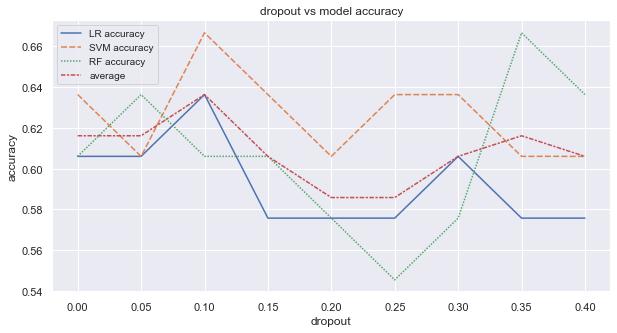

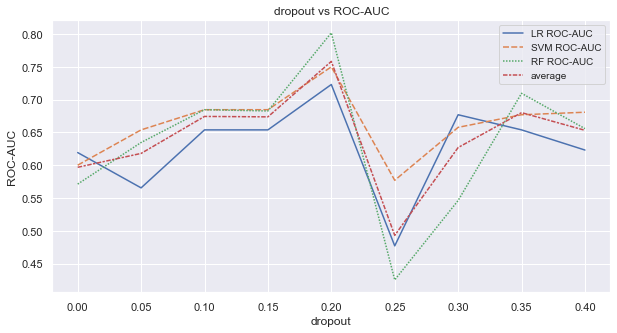

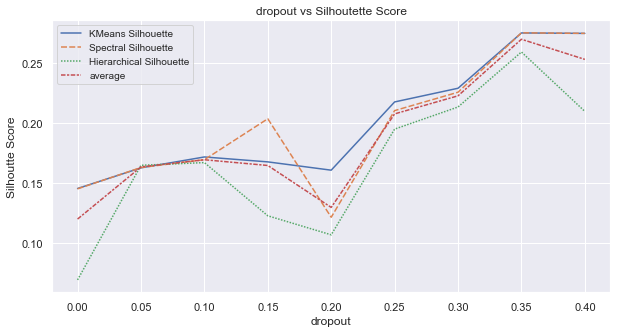

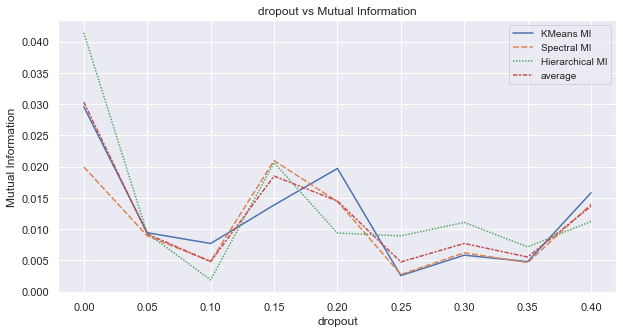

In [6]:
sns.set()
hyperparam = "dropout"

ax = sns.lineplot(data=data_acc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"accuracy")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs model accuracy")
plt.show()

ax = sns.lineplot(data=data_auc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"ROC-AUC")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs ROC-AUC")
plt.show()

ax = sns.lineplot(data=data_ss)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Silhoutte Score")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Silhoutette Score")
plt.show()

ax = sns.lineplot(data=data_mi)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Mutual Information")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Mutual Information")
plt.show()

Compression: 105.88

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00069: early stopping


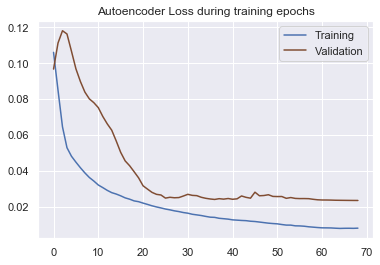

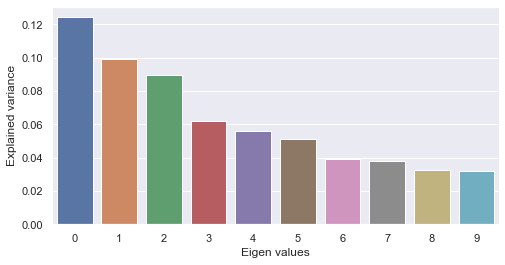

PCA on single-modal explained variance ratio: 0.6234539151191711


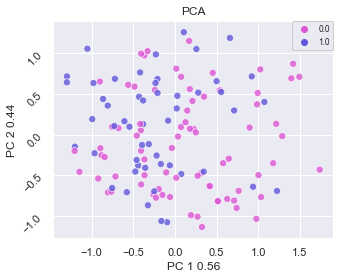

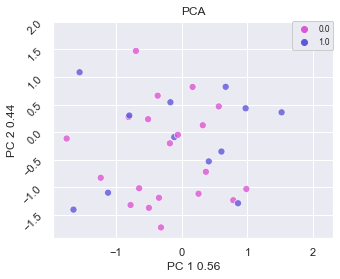

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



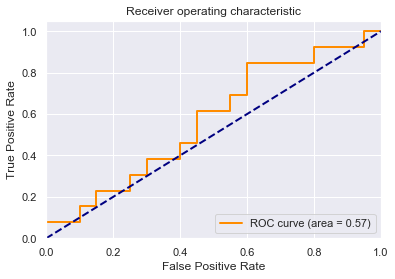

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for Logistic Regression: 0.700000
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6615384615384615 

Best C: 1.0 

Best Gamma: 0.1 



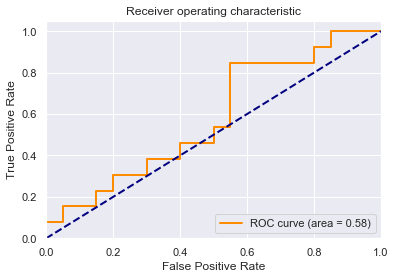

[[15  5]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.44      0.31      0.36        13

    accuracy                           0.58        33
   macro avg       0.53      0.53      0.52        33
weighted avg       0.55      0.58      0.56        33

Training set score for SVM: 0.807692
Testing  set score for SVM: 0.575758
Best score for training data: 0.6538461538461539 

Best #estimators: 100 

Best max depth: 12 



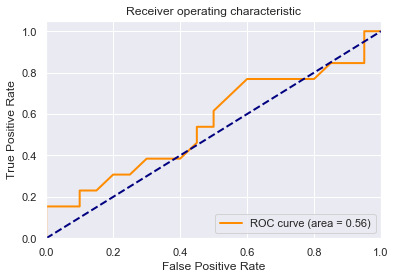

[[14  6]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.64      0.70      0.67        20
           1       0.45      0.38      0.42        13

    accuracy                           0.58        33
   macro avg       0.55      0.54      0.54        33
weighted avg       0.56      0.58      0.57        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758
mutual information: 0.04333260328818083
AE 2 clusters -  silhoutte score: 0.08036614209413528
AE 3 clusters -  silhoutte score: 0.06800498068332672
AE 4 clusters -  silhoutte score: 0.04552927613258362
AE 5 clusters -  silhoutte score: 0.04518934339284897
AE 6 clusters -  silhoutte score: 0.04694106802344322


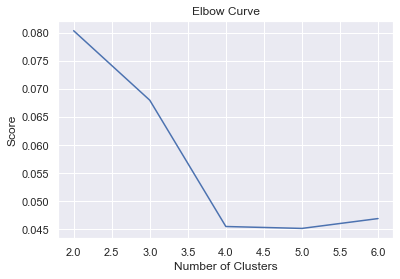

mutual information: 5.0131936389266404e-05
AE 2 clusters -  silhoutte score: 0.10428731143474579
AE 3 clusters -  silhoutte score: 0.0697651356458664
AE 4 clusters -  silhoutte score: 0.027139630168676376
AE 5 clusters -  silhoutte score: 0.028525186702609062
AE 6 clusters -  silhoutte score: 0.029235923662781715


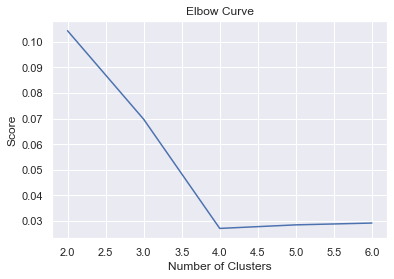

mutual information: 0.017315829215906343
AE 2 clusters -  silhoutte score: 0.06674505025148392
AE 3 clusters -  silhoutte score: 0.05957210808992386
AE 4 clusters -  silhoutte score: 0.0582456961274147
AE 5 clusters -  silhoutte score: 0.03348688408732414
AE 6 clusters -  silhoutte score: 0.04189123585820198


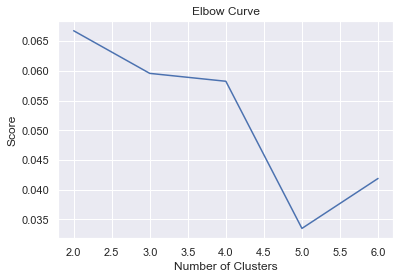

Compression: 105.88

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00066: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00071: early stopping


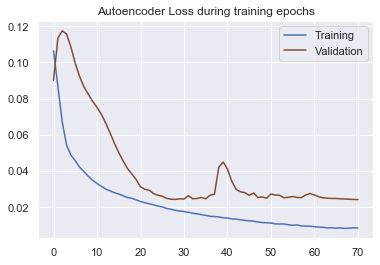

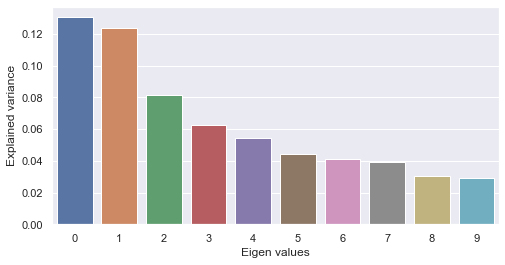

PCA on single-modal explained variance ratio: 0.6365517973899841


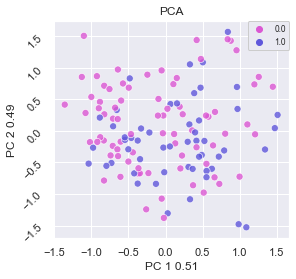

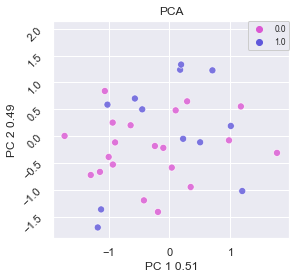

Results for AE: 

Best score for training data: 0.6769230769230768 

Best C: 0.08 



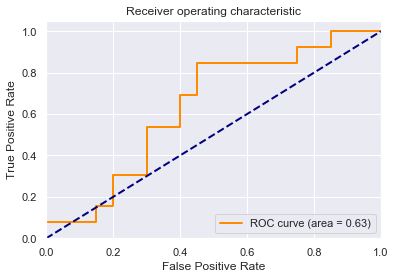

[[17  3]
 [12  1]]


              precision    recall  f1-score   support

           0       0.59      0.85      0.69        20
           1       0.25      0.08      0.12        13

    accuracy                           0.55        33
   macro avg       0.42      0.46      0.41        33
weighted avg       0.45      0.55      0.47        33

Training set score for Logistic Regression: 0.715385
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6615384615384615 

Best C: 1.0 

Best Gamma: 0.1 



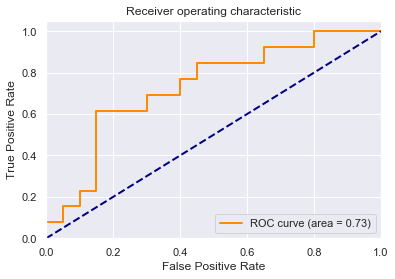

[[18  2]
 [11  2]]


              precision    recall  f1-score   support

           0       0.62      0.90      0.73        20
           1       0.50      0.15      0.24        13

    accuracy                           0.61        33
   macro avg       0.56      0.53      0.48        33
weighted avg       0.57      0.61      0.54        33

Training set score for SVM: 0.784615
Testing  set score for SVM: 0.606061
Best score for training data: 0.6692307692307692 

Best #estimators: 100 

Best max depth: 12 



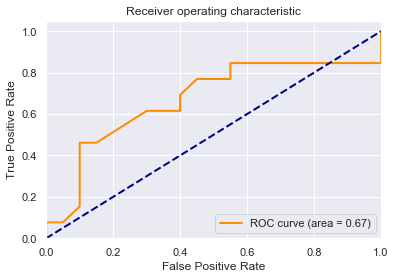

[[19  1]
 [12  1]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75        20
           1       0.50      0.08      0.13        13

    accuracy                           0.61        33
   macro avg       0.56      0.51      0.44        33
weighted avg       0.57      0.61      0.50        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.013381529455826355
AE 2 clusters -  silhoutte score: 0.10419786721467972
AE 3 clusters -  silhoutte score: 0.10464242100715637
AE 4 clusters -  silhoutte score: 0.07116396725177765
AE 5 clusters -  silhoutte score: 0.07484817504882812
AE 6 clusters -  silhoutte score: 0.051719971001148224


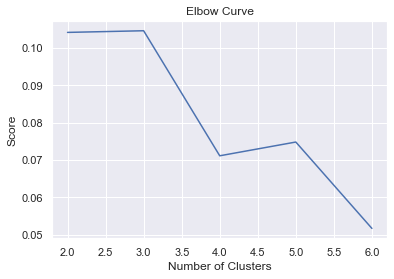

mutual information: 0.0004893572168152254
AE 2 clusters -  silhoutte score: 0.13736721873283386
AE 3 clusters -  silhoutte score: 0.11263854801654816
AE 4 clusters -  silhoutte score: 0.08066050708293915
AE 5 clusters -  silhoutte score: 0.06827767938375473
AE 6 clusters -  silhoutte score: 0.0712718516588211


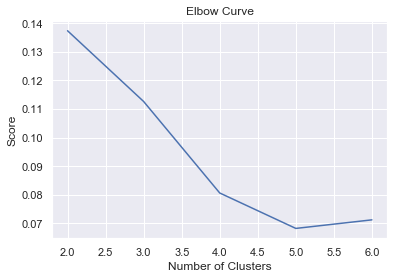

mutual information: 0.02943602039858929
AE 2 clusters -  silhoutte score: 0.10001049935817719
AE 3 clusters -  silhoutte score: 0.10996570438146591
AE 4 clusters -  silhoutte score: 0.05831962078809738
AE 5 clusters -  silhoutte score: 0.05872459337115288
AE 6 clusters -  silhoutte score: 0.06441545486450195


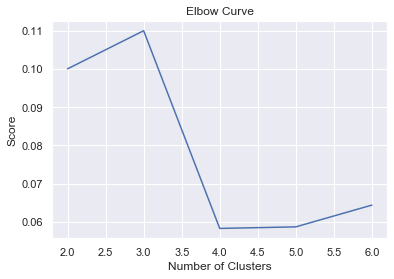

Compression: 105.88

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00069: early stopping


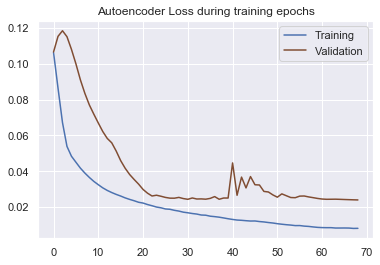

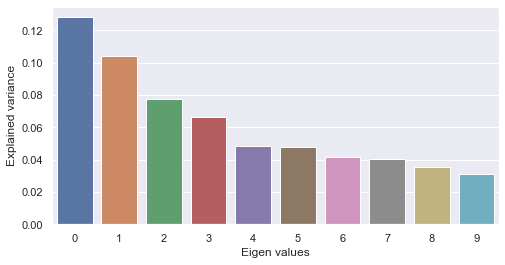

PCA on single-modal explained variance ratio: 0.6217305064201355


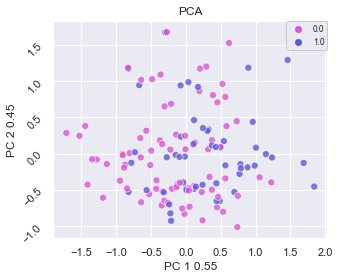

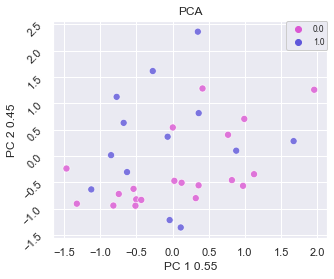

Results for AE: 

Best score for training data: 0.6615384615384615 

Best C: 0.08 



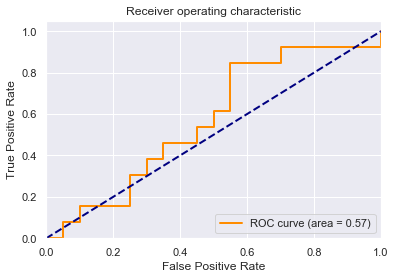

[[16  4]
 [11  2]]


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.33      0.15      0.21        13

    accuracy                           0.55        33
   macro avg       0.46      0.48      0.45        33
weighted avg       0.49      0.55      0.50        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.545455
Best score for training data: 0.6538461538461539 

Best C: 1.0 

Best Gamma: 0.1 



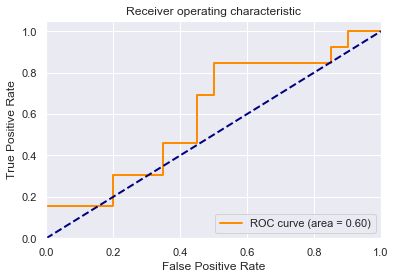

[[15  5]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.44      0.31      0.36        13

    accuracy                           0.58        33
   macro avg       0.53      0.53      0.52        33
weighted avg       0.55      0.58      0.56        33

Training set score for SVM: 0.823077
Testing  set score for SVM: 0.575758
Best score for training data: 0.6846153846153846 

Best #estimators: 140 

Best max depth: None 



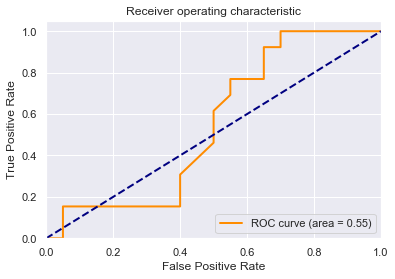

[[16  4]
 [11  2]]


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.33      0.15      0.21        13

    accuracy                           0.55        33
   macro avg       0.46      0.48      0.45        33
weighted avg       0.49      0.55      0.50        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.05086423722838239
AE 2 clusters -  silhoutte score: 0.08244774490594864
AE 3 clusters -  silhoutte score: 0.08231116086244583
AE 4 clusters -  silhoutte score: 0.06359069049358368
AE 5 clusters -  silhoutte score: 0.05052277818322182
AE 6 clusters -  silhoutte score: 0.03442133590579033


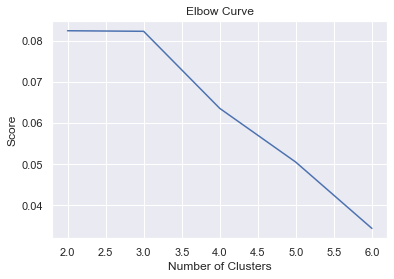

mutual information: 0.017566067263567423
AE 2 clusters -  silhoutte score: 0.10898859798908234
AE 3 clusters -  silhoutte score: 0.06684327125549316
AE 4 clusters -  silhoutte score: 0.04902421683073044
AE 5 clusters -  silhoutte score: 0.049152765423059464
AE 6 clusters -  silhoutte score: 0.05400262400507927


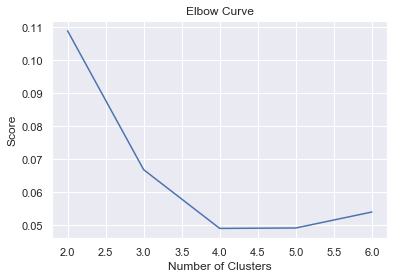

mutual information: 0.03349730958890978
AE 2 clusters -  silhoutte score: 0.08529134839773178
AE 3 clusters -  silhoutte score: 0.09188675880432129
AE 4 clusters -  silhoutte score: 0.039014220237731934
AE 5 clusters -  silhoutte score: 0.048021335154771805
AE 6 clusters -  silhoutte score: 0.048681411892175674


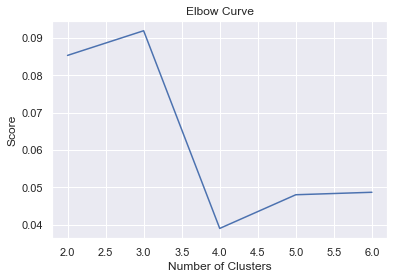

Compression: 105.88

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00067: early stopping


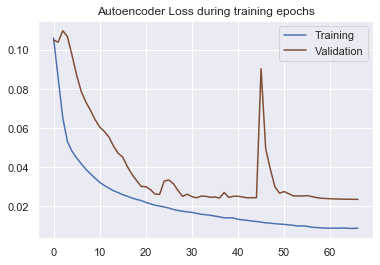

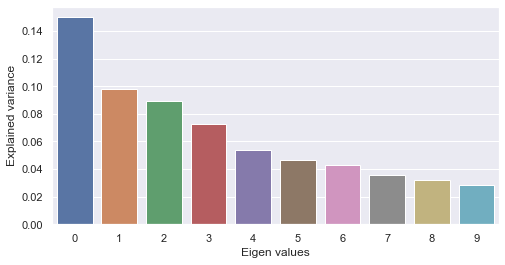

PCA on single-modal explained variance ratio: 0.6503624320030212


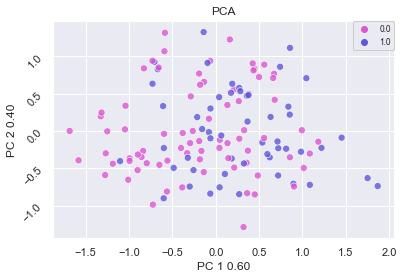

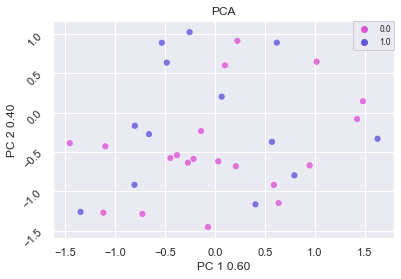

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



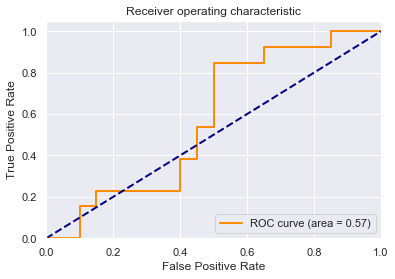

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.707692
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6384615384615385 

Best C: 1.0 

Best Gamma: 0.1 



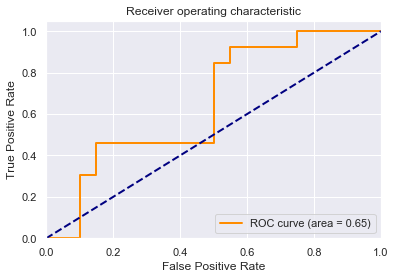

[[18  2]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.67      0.31      0.42        13

    accuracy                           0.67        33
   macro avg       0.67      0.60      0.59        33
weighted avg       0.67      0.67      0.63        33

Training set score for SVM: 0.800000
Testing  set score for SVM: 0.666667
Best score for training data: 0.676923076923077 

Best #estimators: 140 

Best max depth: None 



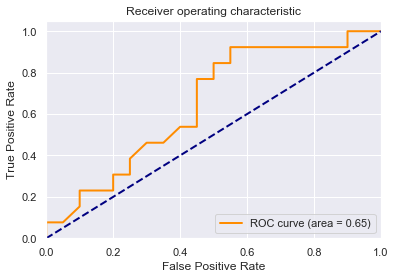

[[16  4]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.50      0.31      0.38        13

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.05245663628406973
AE 2 clusters -  silhoutte score: 0.08271510899066925
AE 3 clusters -  silhoutte score: 0.09179326891899109
AE 4 clusters -  silhoutte score: 0.0830727368593216
AE 5 clusters -  silhoutte score: 0.0723840594291687
AE 6 clusters -  silhoutte score: 0.047391247004270554


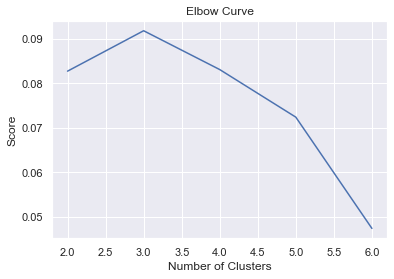

mutual information: 0.06617751065848262
AE 2 clusters -  silhoutte score: 0.08476663380861282
AE 3 clusters -  silhoutte score: 0.0831301286816597
AE 4 clusters -  silhoutte score: 0.06889936327934265
AE 5 clusters -  silhoutte score: 0.0642666146159172
AE 6 clusters -  silhoutte score: 0.06357863545417786


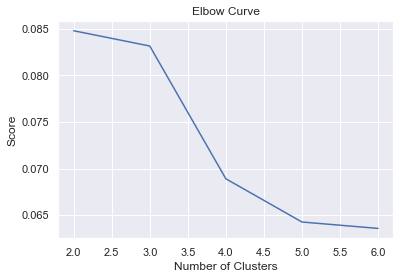

mutual information: 0.029664807586854188
AE 2 clusters -  silhoutte score: 0.059516943991184235
AE 3 clusters -  silhoutte score: 0.06930391490459442
AE 4 clusters -  silhoutte score: 0.04871509596705437
AE 5 clusters -  silhoutte score: 0.055898651480674744
AE 6 clusters -  silhoutte score: 0.05355168133974075


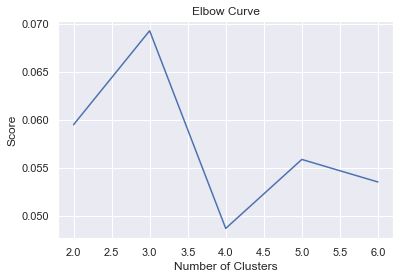

Compression: 105.88

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00070: early stopping


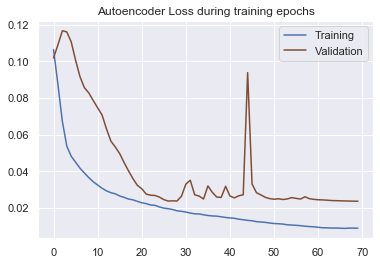

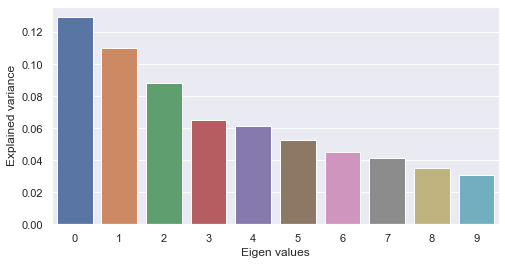

PCA on single-modal explained variance ratio: 0.6588205695152283


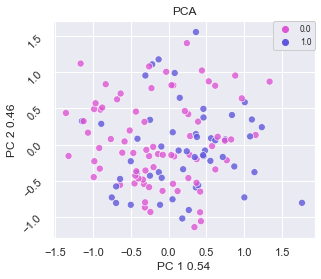

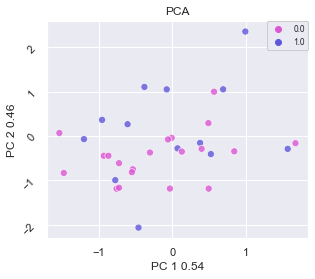

Results for AE: 

Best score for training data: 0.6461538461538462 

Best C: 0.08 



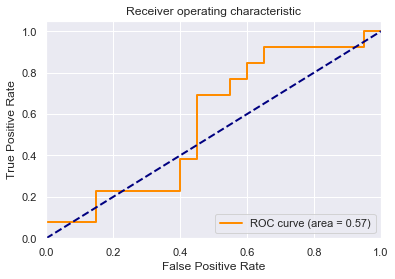

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.715385
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6384615384615383 

Best C: 1.0 

Best Gamma: 0.1 



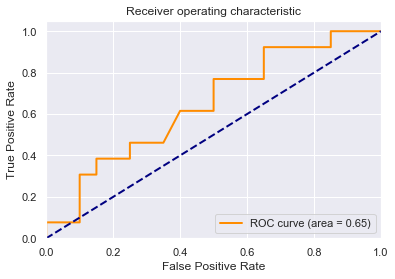

[[14  6]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.50      0.46      0.48        13

    accuracy                           0.61        33
   macro avg       0.58      0.58      0.58        33
weighted avg       0.60      0.61      0.60        33

Training set score for SVM: 0.784615
Testing  set score for SVM: 0.606061
Best score for training data: 0.6384615384615385 

Best #estimators: 140 

Best max depth: None 



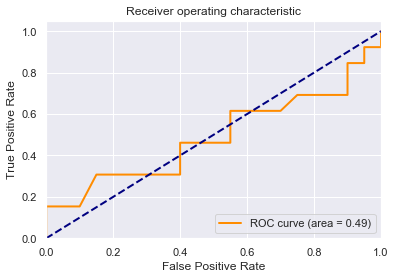

[[17  3]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.57      0.31      0.40        13

    accuracy                           0.64        33
   macro avg       0.61      0.58      0.57        33
weighted avg       0.62      0.64      0.61        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364
mutual information: 0.03635662746786611
AE 2 clusters -  silhoutte score: 0.0999908447265625
AE 3 clusters -  silhoutte score: 0.08779119700193405
AE 4 clusters -  silhoutte score: 0.06615573912858963
AE 5 clusters -  silhoutte score: 0.07463476806879044
AE 6 clusters -  silhoutte score: 0.05172931030392647


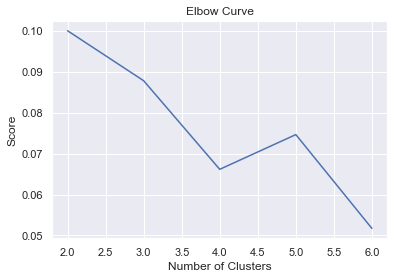

mutual information: 0.0033013406632475444
AE 2 clusters -  silhoutte score: 0.10202375799417496
AE 3 clusters -  silhoutte score: 0.08481571823358536
AE 4 clusters -  silhoutte score: 0.05620702728629112
AE 5 clusters -  silhoutte score: 0.05276725813746452
AE 6 clusters -  silhoutte score: 0.06153451278805733


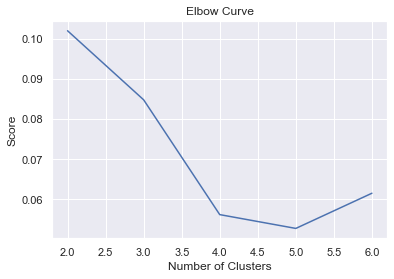

mutual information: 0.012293728046062215
AE 2 clusters -  silhoutte score: 0.08860595524311066
AE 3 clusters -  silhoutte score: 0.094906747341156
AE 4 clusters -  silhoutte score: 0.04104847088456154
AE 5 clusters -  silhoutte score: 0.052372757345438004
AE 6 clusters -  silhoutte score: 0.051904868334531784


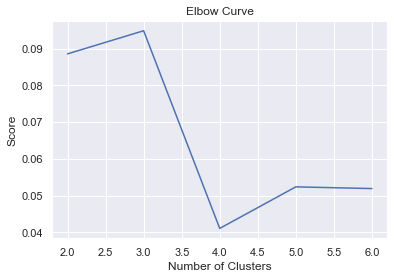

Compression: 105.88

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00072: early stopping


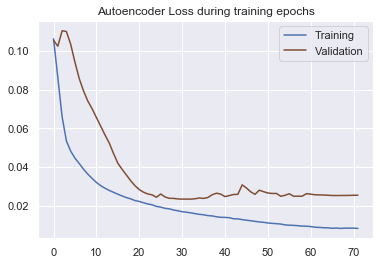

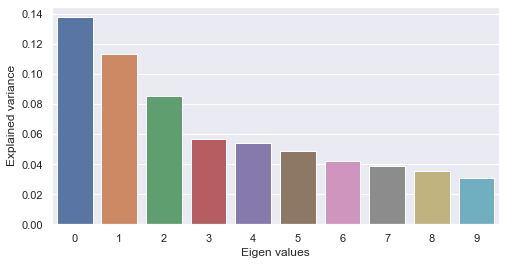

PCA on single-modal explained variance ratio: 0.6431283950805664


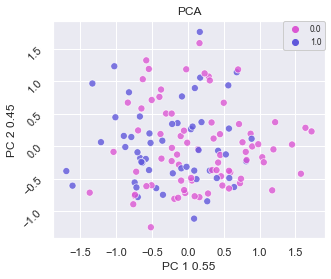

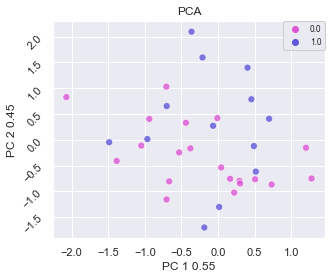

Results for AE: 

Best score for training data: 0.6615384615384616 

Best C: 0.08 



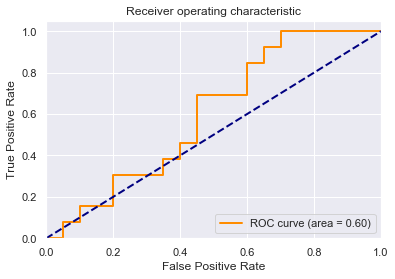

[[15  5]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.44      0.31      0.36        13

    accuracy                           0.58        33
   macro avg       0.53      0.53      0.52        33
weighted avg       0.55      0.58      0.56        33

Training set score for Logistic Regression: 0.700000
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6692307692307693 

Best C: 1.0 

Best Gamma: 0.1 



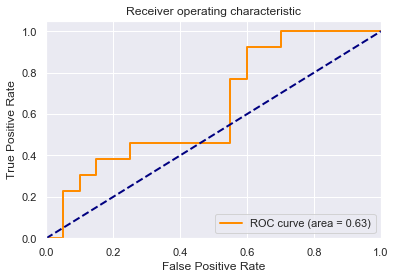

[[15  5]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.55      0.46      0.50        13

    accuracy                           0.64        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.63      0.64      0.63        33

Training set score for SVM: 0.800000
Testing  set score for SVM: 0.636364
Best score for training data: 0.6615384615384615 

Best #estimators: 140 

Best max depth: None 



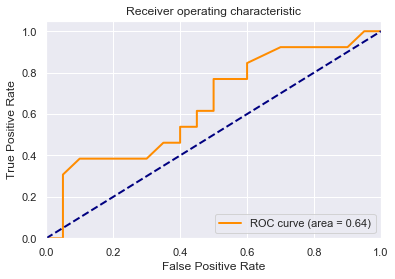

[[13  7]
 [ 7  6]]


              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.46      0.46      0.46        13

    accuracy                           0.58        33
   macro avg       0.56      0.56      0.56        33
weighted avg       0.58      0.58      0.58        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.575758
mutual information: 0.03438737663055086
AE 2 clusters -  silhoutte score: 0.0831165760755539
AE 3 clusters -  silhoutte score: 0.09853140264749527
AE 4 clusters -  silhoutte score: 0.055594198405742645
AE 5 clusters -  silhoutte score: 0.05248285084962845
AE 6 clusters -  silhoutte score: 0.05146230384707451


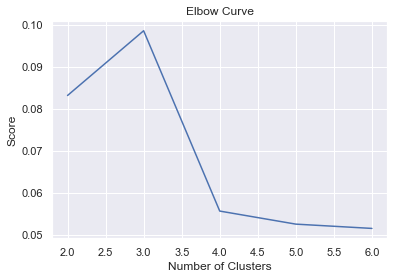

mutual information: 0.004574401930988154
AE 2 clusters -  silhoutte score: 0.10723734647035599
AE 3 clusters -  silhoutte score: 0.07632136344909668
AE 4 clusters -  silhoutte score: 0.06915731728076935
AE 5 clusters -  silhoutte score: 0.0656842291355133
AE 6 clusters -  silhoutte score: 0.055655524134635925


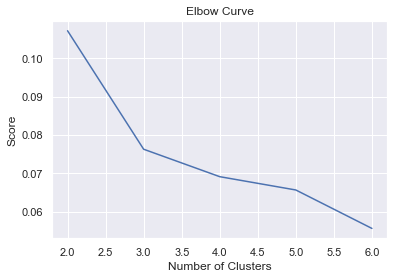

mutual information: 0.037867880215888966
AE 2 clusters -  silhoutte score: 0.09650343656539917
AE 3 clusters -  silhoutte score: 0.1037449911236763
AE 4 clusters -  silhoutte score: 0.06463737785816193
AE 5 clusters -  silhoutte score: 0.038038481026887894
AE 6 clusters -  silhoutte score: 0.04583802819252014


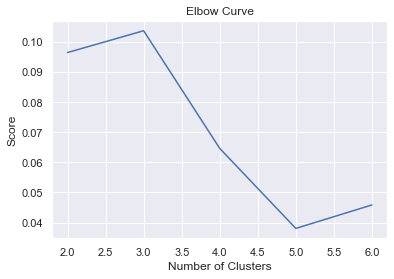

Compression: 105.88

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00073: early stopping


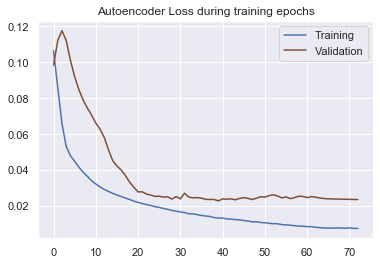

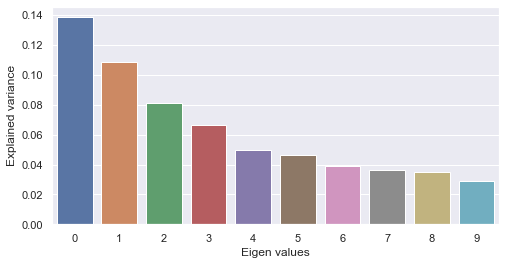

PCA on single-modal explained variance ratio: 0.6306368112564087


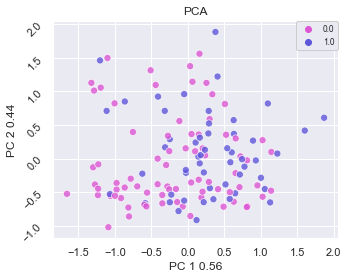

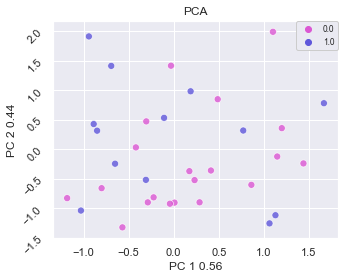

Results for AE: 

Best score for training data: 0.6461538461538461 

Best C: 0.08 



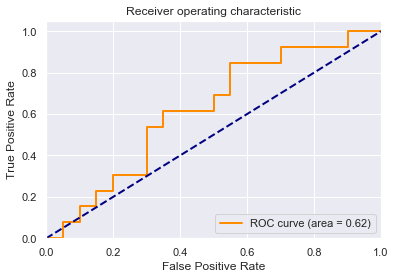

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for Logistic Regression: 0.700000
Testing  set score for Logistic Regression: 0.606061
Best score for training data: 0.6307692307692307 

Best C: 1.0 

Best Gamma: 0.1 



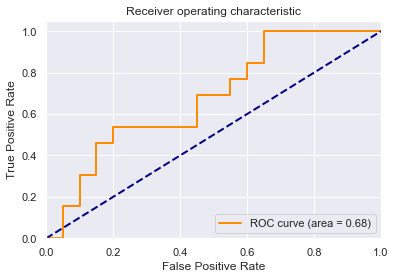

[[18  2]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.67      0.31      0.42        13

    accuracy                           0.67        33
   macro avg       0.67      0.60      0.59        33
weighted avg       0.67      0.67      0.63        33

Training set score for SVM: 0.800000
Testing  set score for SVM: 0.666667
Best score for training data: 0.6 

Best #estimators: 140 

Best max depth: None 



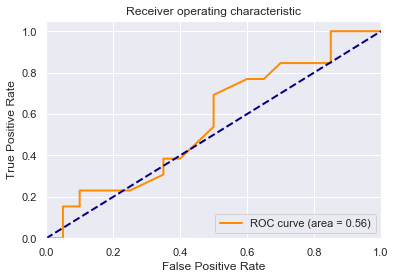

[[17  3]
 [10  3]]


              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.50      0.23      0.32        13

    accuracy                           0.61        33
   macro avg       0.56      0.54      0.52        33
weighted avg       0.58      0.61      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.04328286797124799
AE 2 clusters -  silhoutte score: 0.08316779136657715
AE 3 clusters -  silhoutte score: 0.0828843042254448
AE 4 clusters -  silhoutte score: 0.06453786790370941
AE 5 clusters -  silhoutte score: 0.03794337064027786
AE 6 clusters -  silhoutte score: 0.060294803231954575


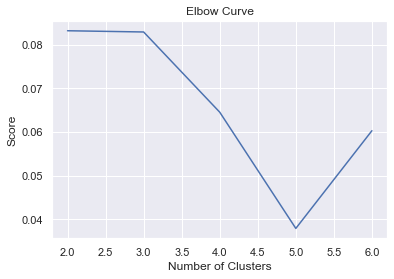

mutual information: 0.00348127218961062
AE 2 clusters -  silhoutte score: 0.12144339829683304
AE 3 clusters -  silhoutte score: 0.07765290886163712
AE 4 clusters -  silhoutte score: 0.06927086412906647
AE 5 clusters -  silhoutte score: 0.04865341633558273
AE 6 clusters -  silhoutte score: 0.045514531433582306


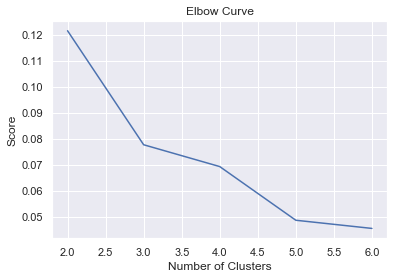

mutual information: 0.05086423722838239
AE 2 clusters -  silhoutte score: 0.0778096541762352
AE 3 clusters -  silhoutte score: 0.050854314118623734
AE 4 clusters -  silhoutte score: 0.04986925050616264
AE 5 clusters -  silhoutte score: 0.050579335540533066
AE 6 clusters -  silhoutte score: 0.05722745880484581


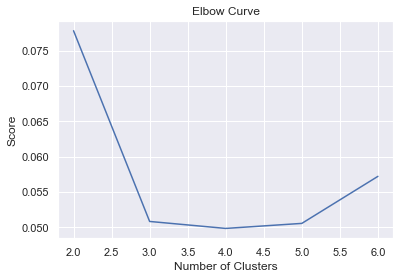

Compression: 105.88

Epoch 00066: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00077: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00077: early stopping


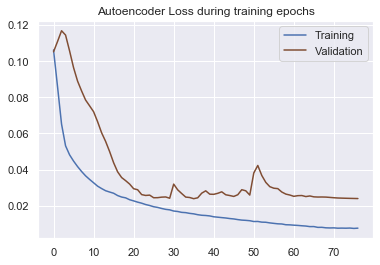

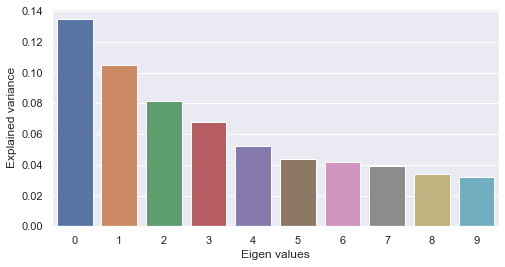

PCA on single-modal explained variance ratio: 0.632461428642273


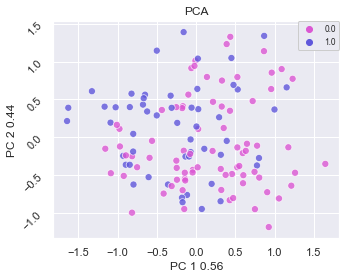

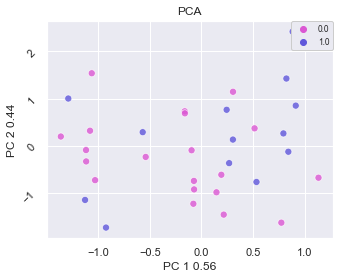

Results for AE: 

Best score for training data: 0.6230769230769231 

Best C: 0.08 



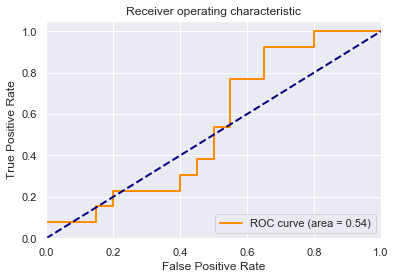

[[16  4]
 [10  3]]


              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.43      0.23      0.30        13

    accuracy                           0.58        33
   macro avg       0.52      0.52      0.50        33
weighted avg       0.54      0.58      0.54        33

Training set score for Logistic Regression: 0.684615
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.646153846153846 

Best C: 1.0 

Best Gamma: 0.1 



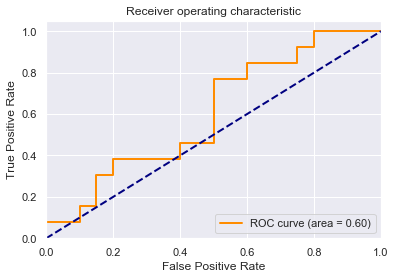

[[13  7]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.42      0.38      0.40        13

    accuracy                           0.55        33
   macro avg       0.52      0.52      0.52        33
weighted avg       0.54      0.55      0.54        33

Training set score for SVM: 0.815385
Testing  set score for SVM: 0.545455
Best score for training data: 0.6846153846153846 

Best #estimators: 100 

Best max depth: 12 



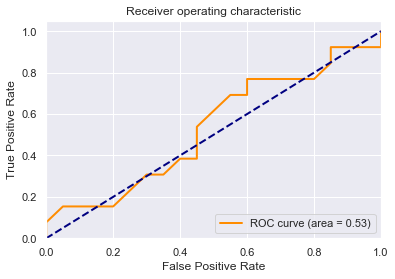

[[13  7]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.36      0.31      0.33        13

    accuracy                           0.52        33
   macro avg       0.48      0.48      0.48        33
weighted avg       0.50      0.52      0.51        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.515152
mutual information: 0.02799700507436735
AE 2 clusters -  silhoutte score: 0.08717909455299377
AE 3 clusters -  silhoutte score: 0.08727803081274033
AE 4 clusters -  silhoutte score: 0.045569948852062225
AE 5 clusters -  silhoutte score: 0.05797211080789566
AE 6 clusters -  silhoutte score: 0.040217459201812744


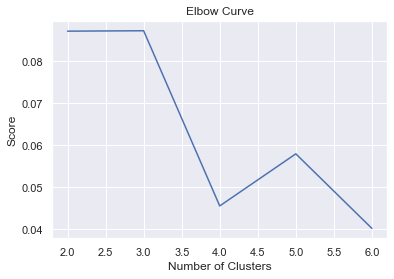

mutual information: 0.023612703822812716
AE 2 clusters -  silhoutte score: 0.08253765851259232
AE 3 clusters -  silhoutte score: 0.09578561037778854
AE 4 clusters -  silhoutte score: 0.06662188470363617
AE 5 clusters -  silhoutte score: 0.05628052353858948
AE 6 clusters -  silhoutte score: 0.058659911155700684


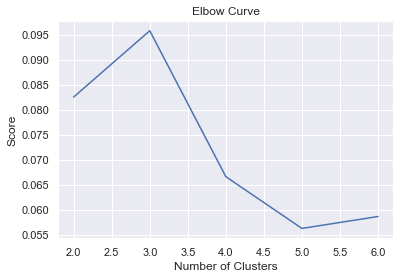

mutual information: 0.022594440767040293
AE 2 clusters -  silhoutte score: 0.08589757978916168
AE 3 clusters -  silhoutte score: 0.06230709329247475
AE 4 clusters -  silhoutte score: 0.06954348832368851
AE 5 clusters -  silhoutte score: 0.03293415904045105
AE 6 clusters -  silhoutte score: 0.03934580832719803


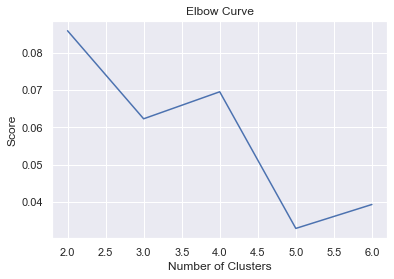

Compression: 105.88

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00072: early stopping


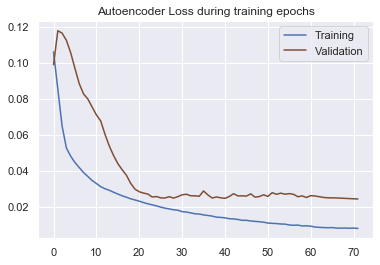

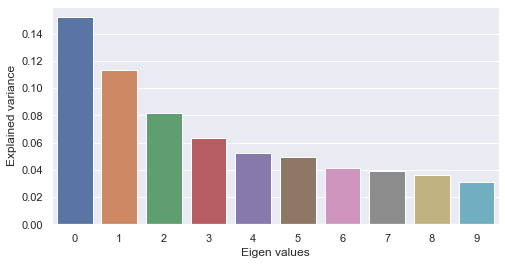

PCA on single-modal explained variance ratio: 0.6598284244537354


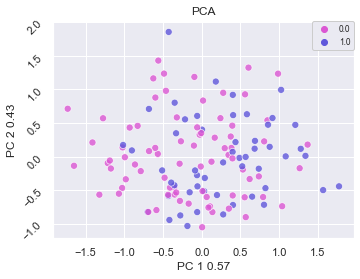

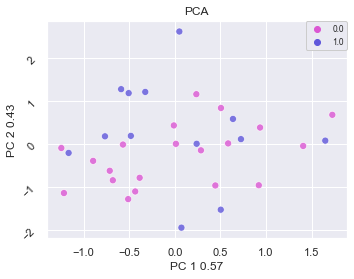

Results for AE: 

Best score for training data: 0.6538461538461539 

Best C: 0.08 



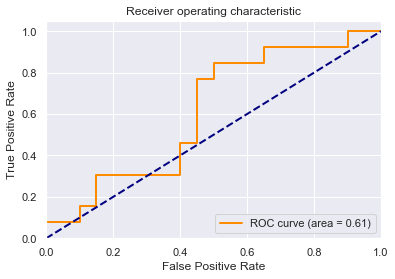

[[17  3]
 [11  2]]


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.40      0.15      0.22        13

    accuracy                           0.58        33
   macro avg       0.50      0.50      0.47        33
weighted avg       0.53      0.58      0.52        33

Training set score for Logistic Regression: 0.707692
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6692307692307692 

Best C: 1.0 

Best Gamma: 0.1 



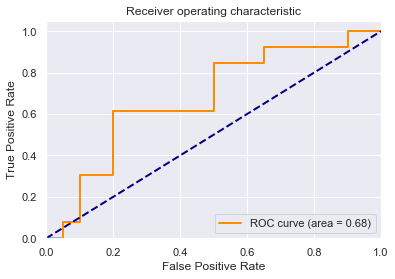

[[18  2]
 [ 9  4]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.67      0.31      0.42        13

    accuracy                           0.67        33
   macro avg       0.67      0.60      0.59        33
weighted avg       0.67      0.67      0.63        33

Training set score for SVM: 0.807692
Testing  set score for SVM: 0.666667
Best score for training data: 0.6615384615384615 

Best #estimators: 100 

Best max depth: 12 



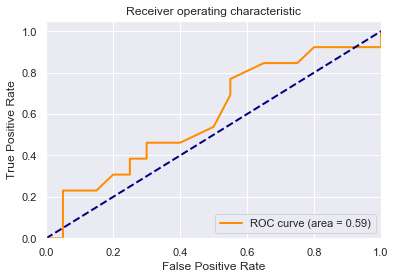

[[15  5]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.50      0.38      0.43        13

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.606061
mutual information: 0.02178199622981467
AE 2 clusters -  silhoutte score: 0.10804592818021774
AE 3 clusters -  silhoutte score: 0.07383863627910614
AE 4 clusters -  silhoutte score: 0.0767698585987091
AE 5 clusters -  silhoutte score: 0.07975631207227707
AE 6 clusters -  silhoutte score: 0.04888947680592537


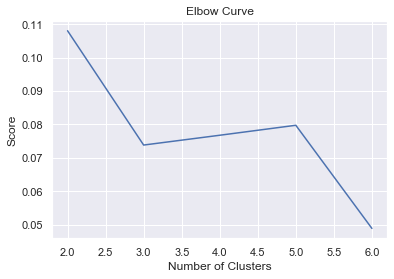

mutual information: 0.040819650852116446
AE 2 clusters -  silhoutte score: 0.08368483185768127
AE 3 clusters -  silhoutte score: 0.09018602222204208
AE 4 clusters -  silhoutte score: 0.0777592882514
AE 5 clusters -  silhoutte score: 0.04938746988773346
AE 6 clusters -  silhoutte score: 0.07379543781280518


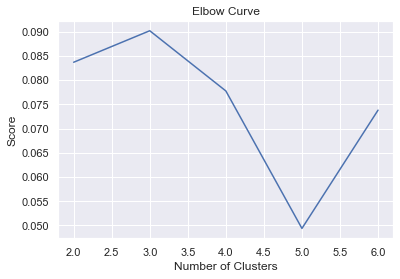

mutual information: 0.017315829215906343
AE 2 clusters -  silhoutte score: 0.09243463724851608
AE 3 clusters -  silhoutte score: 0.1050017699599266
AE 4 clusters -  silhoutte score: 0.06378829479217529
AE 5 clusters -  silhoutte score: 0.06861788034439087
AE 6 clusters -  silhoutte score: 0.0754856988787651


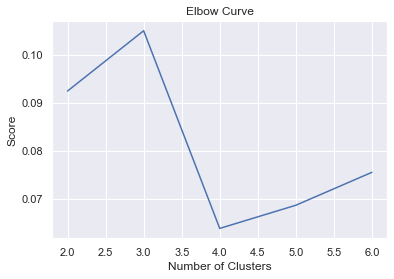

Compression: 105.88

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00067: early stopping


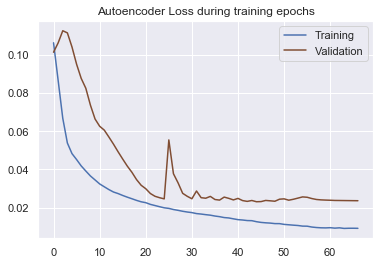

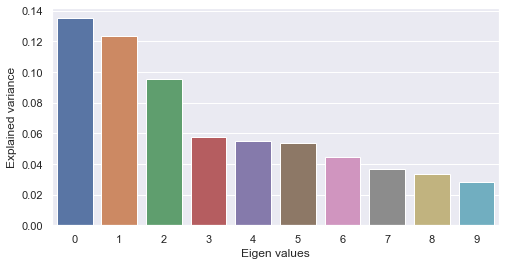

PCA on single-modal explained variance ratio: 0.6626698970794678


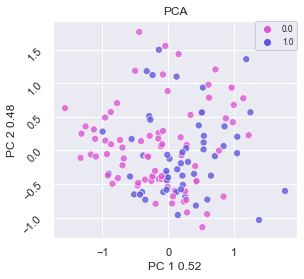

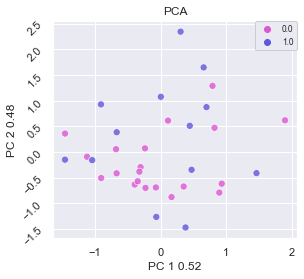

Results for AE: 

Best score for training data: 0.6307692307692307 

Best C: 0.08 



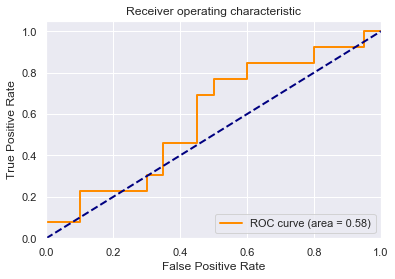

[[18  2]
 [10  3]]


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       0.60      0.23      0.33        13

    accuracy                           0.64        33
   macro avg       0.62      0.57      0.54        33
weighted avg       0.63      0.64      0.59        33

Training set score for Logistic Regression: 0.676923
Testing  set score for Logistic Regression: 0.636364
Best score for training data: 0.6615384615384615 

Best C: 1.0 

Best Gamma: 0.1 



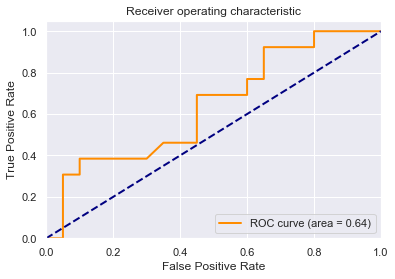

[[17  3]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.62      0.38      0.48        13

    accuracy                           0.67        33
   macro avg       0.65      0.62      0.62        33
weighted avg       0.66      0.67      0.65        33

Training set score for SVM: 0.792308
Testing  set score for SVM: 0.666667
Best score for training data: 0.6692307692307693 

Best #estimators: 140 

Best max depth: None 



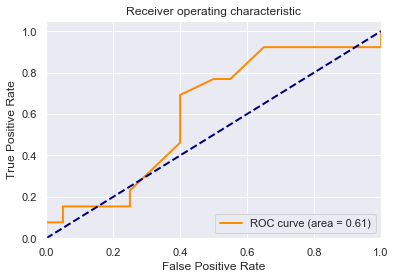

[[15  5]
 [10  3]]


              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.38      0.23      0.29        13

    accuracy                           0.55        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.51      0.55      0.52        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.545455
mutual information: 0.006402542615155615
AE 2 clusters -  silhoutte score: 0.12026429176330566
AE 3 clusters -  silhoutte score: 0.08582510054111481
AE 4 clusters -  silhoutte score: 0.07992291450500488
AE 5 clusters -  silhoutte score: 0.07571882009506226
AE 6 clusters -  silhoutte score: 0.07875033468008041


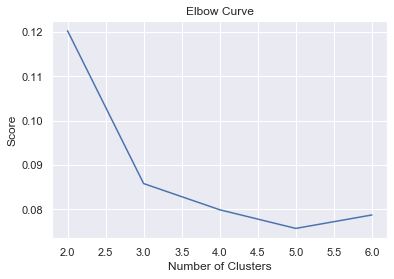

mutual information: 0.0040210197626563094
AE 2 clusters -  silhoutte score: 0.1387409269809723
AE 3 clusters -  silhoutte score: 0.08219616860151291
AE 4 clusters -  silhoutte score: 0.08432194590568542
AE 5 clusters -  silhoutte score: 0.07268847525119781
AE 6 clusters -  silhoutte score: 0.07772315293550491


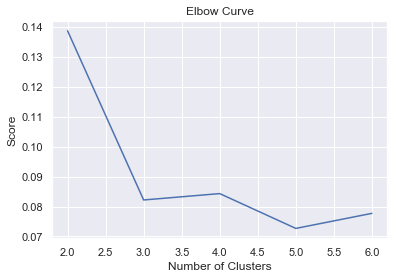

mutual information: 0.038038745251235816
AE 2 clusters -  silhoutte score: 0.08458264917135239
AE 3 clusters -  silhoutte score: 0.07290564477443695
AE 4 clusters -  silhoutte score: 0.07266806066036224
AE 5 clusters -  silhoutte score: 0.046048037707805634
AE 6 clusters -  silhoutte score: 0.04118437319993973


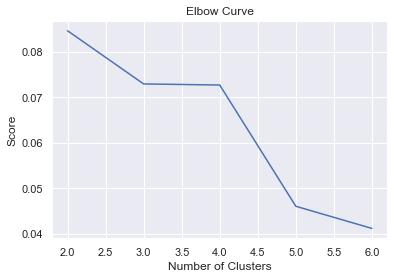

Compression: 105.88

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00065: early stopping


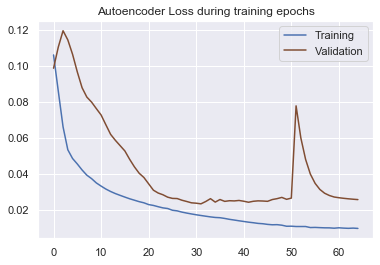

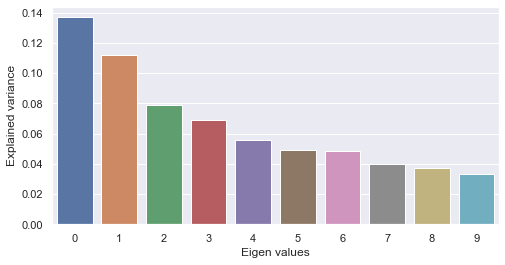

PCA on single-modal explained variance ratio: 0.66109299659729


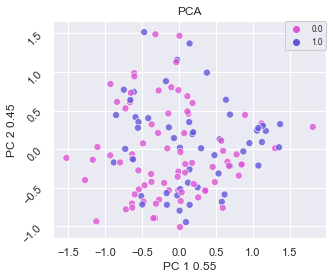

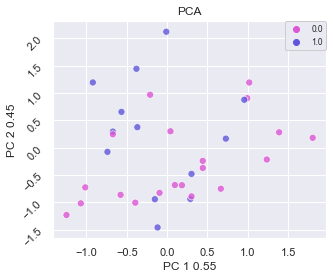

Results for AE: 

Best score for training data: 0.6384615384615385 

Best C: 0.08 



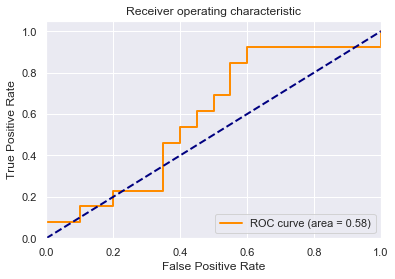

[[16  4]
 [10  3]]


              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.43      0.23      0.30        13

    accuracy                           0.58        33
   macro avg       0.52      0.52      0.50        33
weighted avg       0.54      0.58      0.54        33

Training set score for Logistic Regression: 0.692308
Testing  set score for Logistic Regression: 0.575758
Best score for training data: 0.6384615384615384 

Best C: 1.0 

Best Gamma: 0.1 



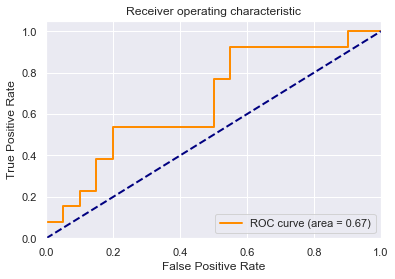

[[16  4]
 [ 8  5]]


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.56      0.38      0.45        13

    accuracy                           0.64        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.62      0.64      0.62        33

Training set score for SVM: 0.792308
Testing  set score for SVM: 0.636364
Best score for training data: 0.6461538461538462 

Best #estimators: 100 

Best max depth: 12 



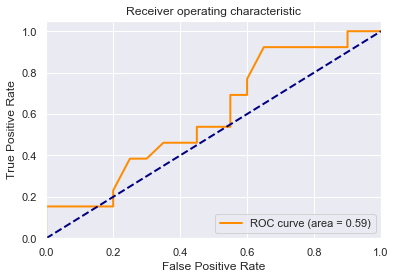

[[19  1]
 [11  2]]


              precision    recall  f1-score   support

           0       0.63      0.95      0.76        20
           1       0.67      0.15      0.25        13

    accuracy                           0.64        33
   macro avg       0.65      0.55      0.50        33
weighted avg       0.65      0.64      0.56        33

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.636364
mutual information: 0.0036803907157098976
AE 2 clusters -  silhoutte score: 0.09631079435348511
AE 3 clusters -  silhoutte score: 0.09245366603136063
AE 4 clusters -  silhoutte score: 0.05996419116854668
AE 5 clusters -  silhoutte score: 0.044950567185878754
AE 6 clusters -  silhoutte score: 0.05319466069340706


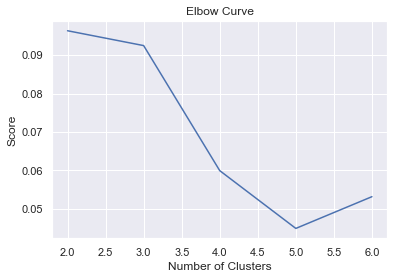

mutual information: 0.014611542144400842
AE 2 clusters -  silhoutte score: 0.08914991468191147
AE 3 clusters -  silhoutte score: 0.10270010679960251
AE 4 clusters -  silhoutte score: 0.05768697336316109
AE 5 clusters -  silhoutte score: 0.040510471910238266
AE 6 clusters -  silhoutte score: 0.03793475031852722


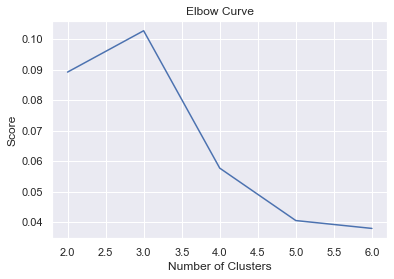

mutual information: 0.00020961134265425266
AE 2 clusters -  silhoutte score: 0.1153387650847435
AE 3 clusters -  silhoutte score: 0.10239866375923157
AE 4 clusters -  silhoutte score: 0.04837161675095558
AE 5 clusters -  silhoutte score: 0.04132437705993652
AE 6 clusters -  silhoutte score: 0.04962402209639549


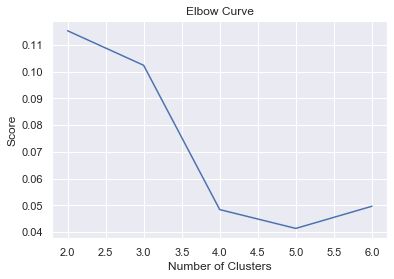

In [7]:
###  Hyperparamter tuning
encoding_dims=[100]
mus=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dropouts = [0]
l1s = [0.0000005]
l2s = [0.0000001]
scores = []
for encoding_dim in encoding_dims:
    for mu in mus:
        for dropout in dropouts:
            for l1 in l1s:
                for l2 in l2s:
                    ## Build and Train Autoencoder
                    autoencoder, encoder, decoder, loss = Models.build_and_train_autoencoder(X_swapped_concat,
                                                                                  X_train_concat,
                                                                                  encoding_dim=encoding_dim, 
                                                                                  regularizer=tf.keras.regularizers.l1_l2(l1,l2),
                                                                                  dropout=dropout,
                                                                                  epochs=200)
                    ## Encode datasets
                    X_latent_dae = Models.encode_dataset(X_train_concat, encoder)
                    X_latent_test_dae = Models.encode_dataset(X_test_concat, encoder)

                    ## PCA ON AUTOENCODER LATENT SPACE
                    X_latent_pca_dae, X_latent_test_pca_dae = Models.perform_PCA(X_latent_dae, X_latent_test_dae, y_train, y_test, n_components=10)

                    ### CLASSIFICATION ###
                    classify = Models.classify(X_latent_dae, X_latent_test_dae, np.ravel(y_train), np.ravel(y_test), model_type="AE")

                    ### CLUSTERING ###
                    clustering = Models.cluster(X_latent_dae,np.ravel(y_train), model_type="AE")

                    scores.append([mu,dropout,l1,l2,loss] + classify + clustering)

In [9]:
scores = pd.DataFrame(scores,
                      columns=["mu","dropout","l1","l2","loss","LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
scores

mu  dropout        l1        l2      loss  LR accuracy  SVM accuracy  \
0   0.1     0.00  0.000005  0.000003  0.013641     0.636364      0.606061   
1   0.1     0.05  0.000005  0.000003  0.013566     0.636364      0.666667   
2   0.1     0.10  0.000005  0.000003  0.022064     0.666667      0.666667   
3   0.1     0.15  0.000005  0.000003  0.025561     0.606061      0.606061   
4   0.1     0.20  0.000005  0.000003  0.023294     0.606061      0.606061   
5   0.1     0.25  0.000005  0.000003  0.022743     0.545455      0.606061   
6   0.1     0.30  0.000005  0.000003  0.022663     0.606061      0.666667   
7   0.1     0.35  0.000005  0.000003  0.024981     0.636364      0.636364   
8   0.1     0.40  0.000005  0.000003  0.025760     0.575758      0.606061   
9   0.1     0.45  0.000005  0.000003  0.035750     0.606061      0.606061   
10  0.1     0.50  0.000005  0.000003  0.026449     0.606061      0.606061   

    RF accuracy  LR ROC-AUC  SVM ROC-AUC  RF ROC-AUC  KMeans Silhouette  \
0      0.606061    0.638462     0.650000    0.640385           0.140924   
1      0.727273    0.673077     0.680769    0.661538           0.138472   
2      0.666667    0.673077     0.665385    0.723077           0.187839   
3      0.636364    0.707692     0.676923    0.728846           0.185656   
4      0.666667    0.692308     0.650000    0.688462           0.172623   
5      0.696970    0.692308     0.734615    0.776923           0.213183   
6      0.636364    0.738462     0.769231    0.769231           0.169153   
7      0.606061    0.719231     0.753846    0.680769           0.199911   
8      0.696970    0.738462     0.761538    0.676923           0.195435   
9      0.636364    0.715385     0.723077    0.582692           0.228255   
10     0.757576    0.711538     0.761538    0.792308           0.242302   

    Spectral Silhouette  Hierarchical Silhouette  KMeans MI  Spectral MI  \
0              0.137589                 0.095757   0.012468     0.021350   
1              0.115194                 0.124548   0.006217     0.011704   
2              0.185610                 0.166283   0.009652     0.029101   
3              0.186020                 0.186176   0.010251     0.008591   
4              0.167444                 0.153901   0.004271     0.031303   
5              0.213183                 0.206284   0.048045     0.008425   
6              0.170781                 0.154608   0.013311     0.012663   
7              0.187259                 0.142290   0.039893     0.051887   
8              0.191707                 0.199223   0.030197     0.028329   
9              0.219777                 0.202718   0.015678     0.026249   
10             0.216314                 0.208274   0.021937     0.001172   

    Hierarchical MI  
0          0.017387  
1          0.007087  
2          0.012639  
3          0.016146  
4          0.015966  
5          0.003660  
6          0.009858  
7          0.028370  
8          0.025904  
9          0.012560  
10         0.004192

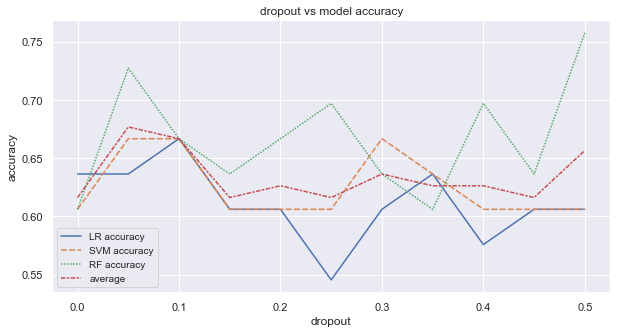

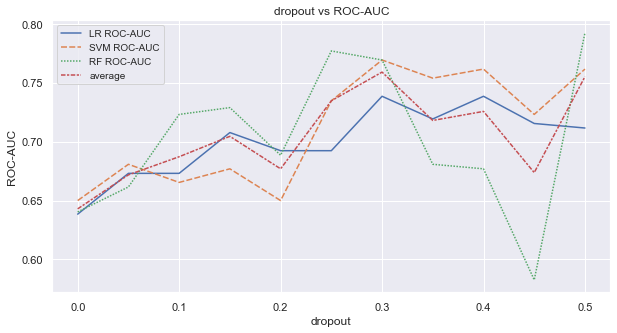

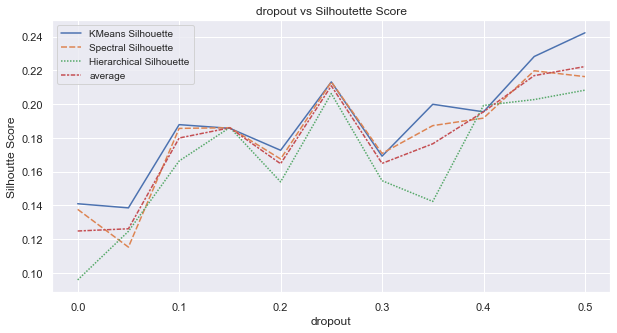

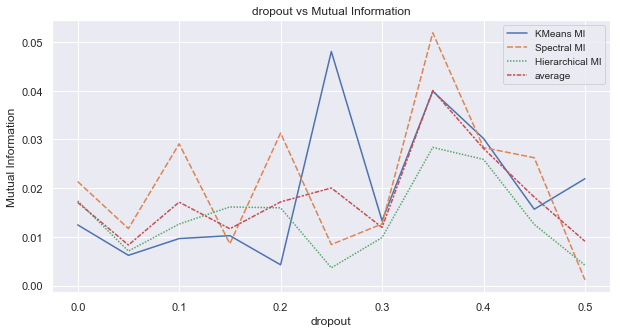

In [11]:
scores.index = dropouts

data_acc = scores[["LR accuracy","SVM accuracy","RF accuracy"]]
data_acc.loc[:,"average"] = data_acc.mean(axis=1)

data_auc = scores[["LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC"]]
data_auc.loc[:,"average"] = data_auc.mean(axis=1)

data_ss = scores[["KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette"]]
data_ss.loc[:,"average"] = data_ss.mean(axis=1)

data_mi = scores[["KMeans MI","Spectral MI","Hierarchical MI"]]
data_mi.loc[:,"average"] = data_mi.mean(axis=1)

sns.set()
hyperparam = "dropout"

ax = sns.lineplot(data=data_acc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"accuracy")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs model accuracy")
plt.show()

ax = sns.lineplot(data=data_auc)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"ROC-AUC")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs ROC-AUC")
plt.show()

ax = sns.lineplot(data=data_ss)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Silhoutte Score")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Silhoutette Score")
plt.show()

ax = sns.lineplot(data=data_mi)
plt.legend(fontsize='small')
ax.set_xlabel(hyperparam)
ax.set_ylabel(f"Mutual Information")
ax.figure.set_size_inches(10 , 5)
ax.set_title(f"{hyperparam} vs Mutual Information")
plt.show()